In [1]:
import pandas as pd
import numpy as np
# Below lib will not show any warning going forward

import warnings
warnings.filterwarnings("ignore")

# <font color = red> Resampling and Shifting

In [2]:
# Following Data is StarBucks Stock Price from 2015-2018

starbks = pd.read_csv("Data/starbucks.csv", index_col='Date', parse_dates=True) 

In [3]:
starbks.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

In [4]:
starbks.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## <font color = blue> Resample()

**A common operation with time series data is resampling based on the time series index.**
When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)
    
The **aggregation function** is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

In [5]:
# Resampling Data Based on Time

starbks.resample(rule='A').mean()    # Converting Daily data to Yearly Data 

Close        Volume
Date                               
2015-12-31  50.078100  8.649190e+06
2016-12-31  53.891732  9.300633e+06
2017-12-31  55.457310  9.296078e+06
2018-12-31  56.870005  1.122883e+07

In [6]:
# Creating A custom Function
def first_day(entry):
    if len(entry) != 0:
        return entry[0]

In [7]:
# Using the custom function for resampling

starbks.resample(rule='A').apply(first_day)

Close    Volume
Date                         
2015-12-31  38.0061   6906098
2016-12-31  55.0780  13521544
2017-12-31  53.1100   7809307
2018-12-31  56.3243   7215978

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

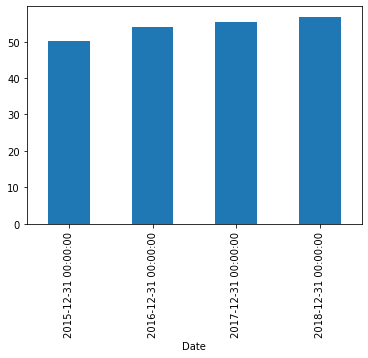

In [9]:
# Ploting the Resample

starbks['Close'].resample(rule='A').mean().plot.bar()

<AxesSubplot:xlabel='Date'>

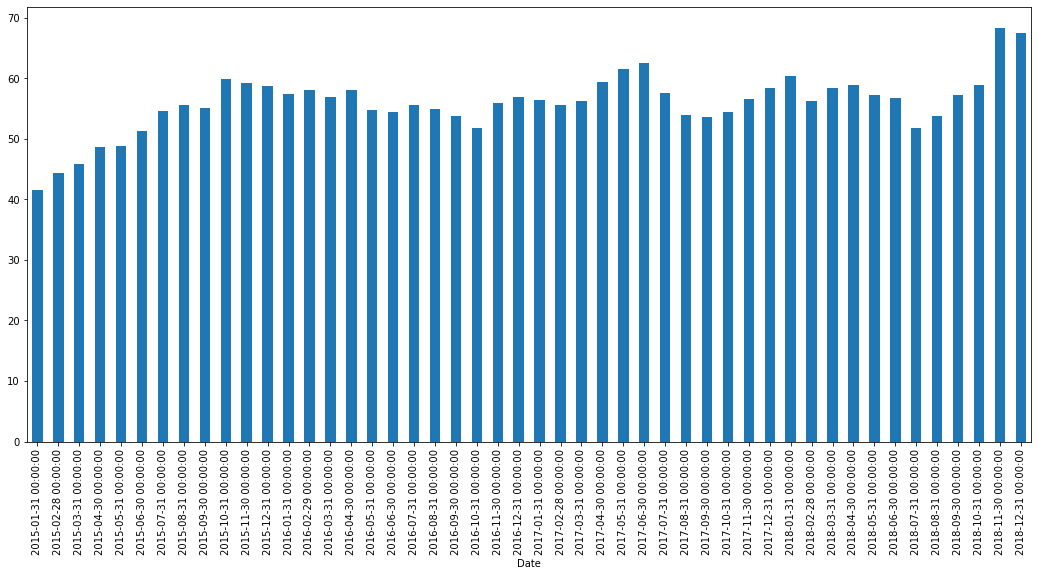

In [10]:
starbks['Close'].resample(rule='M').max().plot.bar(figsize=(18,8))

------------------------------------------------------------------------------------------------------------------------

# <font color = red> Time Shifting

**Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood.**

In [11]:
starbks.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

In [12]:
starbks.tail()

Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183

## <font color = blue>  .shift() forward
**This method shifts the entire date index a given number of rows, without regard for time periods (months & years).**<br>It returns a modified copy of the original DataFrame.

In [13]:
# Shifting the Data by 1 row

starbks.shift(1)

Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0
...             ...         ...
2018-12-24  61.3900  23524888.0
2018-12-26  60.5600   6323252.0
2018-12-27  63.0800  16646238.0
2018-12-28  63.2000  11308081.0
2018-12-31  63.3900   7712127.0

[1006 rows x 2 columns]

In [14]:
# Shiting backwards

starbks.shift(-1)

Close      Volume
Date                           
2015-01-02  37.2781  11623796.0
2015-01-05  36.9748   7664340.0
2015-01-06  37.8848   9732554.0
2015-01-07  38.4961  13170548.0
2015-01-08  37.2361  27556706.0
...             ...         ...
2018-12-24  63.0800  16646238.0
2018-12-26  63.2000  11308081.0
2018-12-27  63.3900   7712127.0
2018-12-28  64.4000   7690183.0
2018-12-31      NaN         NaN

[1006 rows x 2 columns]

In [15]:
# Giving the Freq paramenter

starbks.shift(periods=1, freq='M')   # Shifting the Data by a month

Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548
...             ...       ...
2018-12-31  60.5600   6323252
2018-12-31  63.0800  16646238
2018-12-31  63.2000  11308081
2018-12-31  63.3900   7712127
2019-01-31  64.4000   7690183

[1006 rows x 2 columns]

---------------------------------------------------------------------------------------------------------------------

# <font color=red>  Rolling and Expanding

**A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!**

In [16]:
starbks.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

<AxesSubplot:xlabel='Date'>

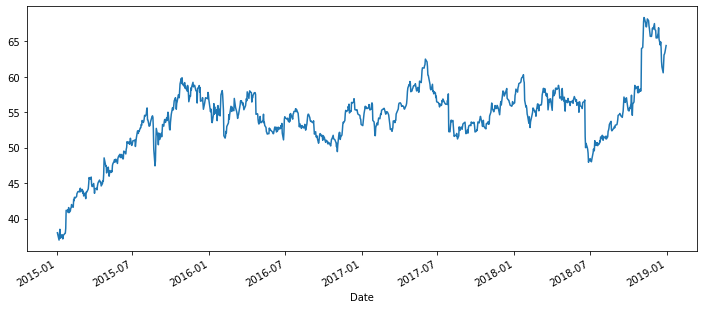

In [17]:
# Plotting the closing price

starbks['Close'].plot(figsize=(12,5))

In [18]:
# Rolling a 7 Day average

starbks.rolling(window=7).mean().head(10)

Close        Volume
Date                               
2015-01-02        NaN           NaN
2015-01-05        NaN           NaN
2015-01-06        NaN           NaN
2015-01-07        NaN           NaN
2015-01-08        NaN           NaN
2015-01-09        NaN           NaN
2015-01-12  37.616786  1.238222e+07
2015-01-13  37.578786  1.297288e+07
2015-01-14  37.614786  1.264020e+07
2015-01-15  37.638114  1.270624e+07

<AxesSubplot:xlabel='Date'>

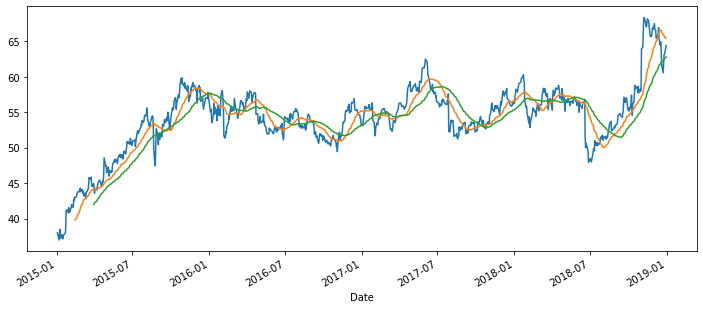

In [19]:
starbks['Close'].plot(figsize=(12,5))
starbks.rolling(window=30).mean()['Close'].plot(figsize=(12,5))   # 30 days rolling mean
starbks.rolling(window=60).mean()['Close'].plot(figsize=(12,5))   # 60 days rolling mean

In [20]:
starbks['Close: 30 day MA'] = starbks['Close'].rolling(window=30).mean()
starbks['Close: 60 day MA'] = starbks['Close'].rolling(window=60).mean()
starbks.tail()

Close    Volume  Close: 30 day MA  Close: 60 day MA
Date                                                           
2018-12-24  60.56   6323252         65.963703         62.258177
2018-12-26  63.08  16646238         65.791913         62.367235
2018-12-27  63.20  11308081         65.647000         62.499182
2018-12-28  63.39   7712127         65.525000         62.634130
2018-12-31  64.40   7690183         65.437000         62.787900

<AxesSubplot:xlabel='Date'>

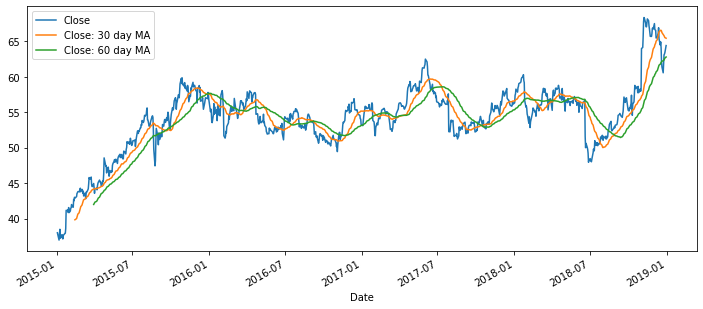

In [21]:
starbks[['Close','Close: 30 day MA','Close: 60 day MA']].plot(figsize=(12,5)) 

## <font color=blue> Expanding

**Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.**

<AxesSubplot:xlabel='Date'>

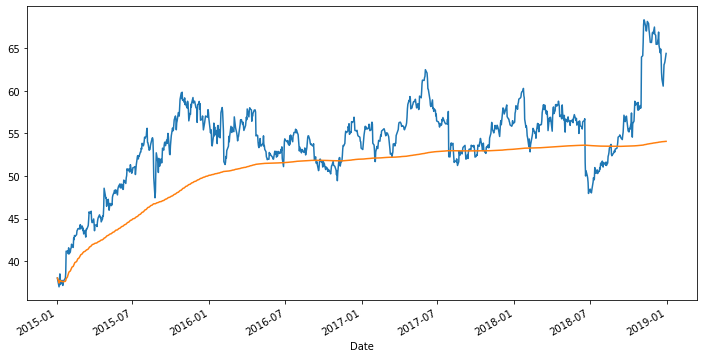

In [22]:
starbks['Close'].plot(figsize=(12,5))
starbks['Close'].expanding().mean().plot(figsize=(12,6))

# Expanding will take average of every period before the particular value

---------------------------------------------------------------------------------------------------------------------

# <font color = red>  Introduction to Statsmodels

**Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.**

## <font color = blue> Using Statsmodels to get the trend
 
**the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.**

In [23]:
## Following Data is USA Economic Data from 1959 to 2009

econ = pd.read_csv("Data/macrodata.csv", index_col=0, parse_dates=True)
econ.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

<AxesSubplot:>

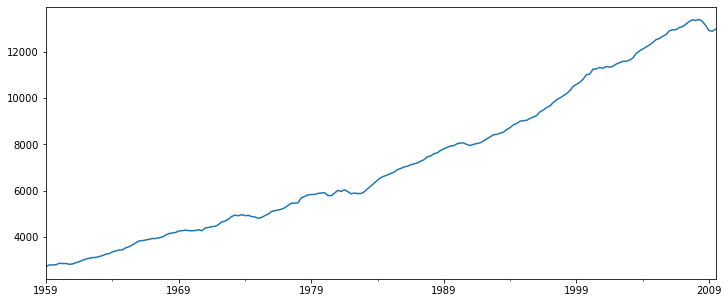

In [24]:
# Ploting the GDP

econ['realgdp'].plot(figsize=(12,5))

In [25]:
# Importing from statsmodel library, the hp filter to filter the trend and cyclical component from the dataset

from statsmodels.tsa.filters.hp_filter import hpfilter

In [26]:
gdp_cycle, gdp_trend = hpfilter(econ['realgdp'],lamb=1600)

In [27]:
type(gdp_trend)   # return the series

pandas.core.series.Series

In [28]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

<AxesSubplot:>

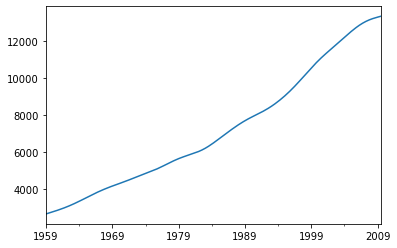

In [29]:
gdp_trend.plot()

<AxesSubplot:>

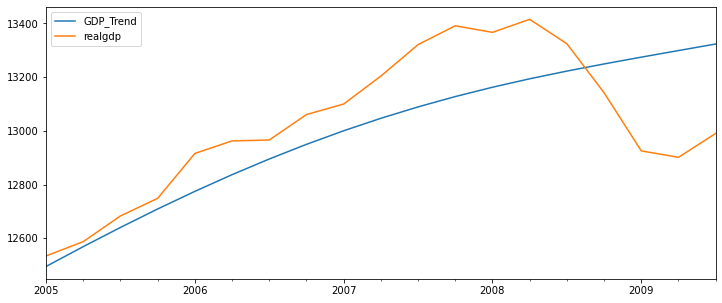

In [30]:
# Plotting thr Gdp and Gdp trend 

econ['GDP_Trend'] = gdp_trend
econ[['GDP_Trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5)) # Subsetting the Plot from Jan 2005 Onwards

-------------------------------------------------------------------------------------------------------------------------

## <font color = Blue> ETS ( Error/Trend/Seasonality Models) Decomposition

## Seasonal Decomposition
**Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.**


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

<font color = green> <b>For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [31]:
airline = pd.read_csv("Data/airline_passengers.csv", index_col="Month", parse_dates=True)
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

<AxesSubplot:xlabel='Month'>

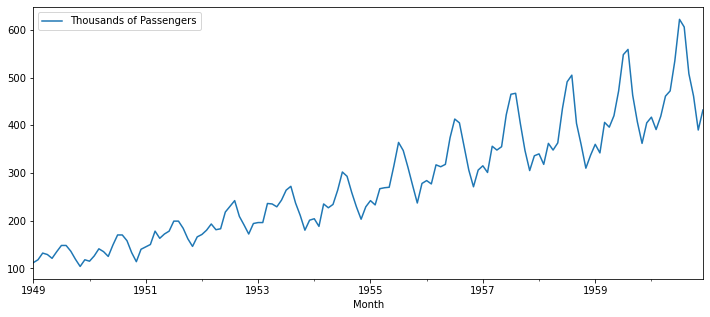

In [32]:
# Plotting the data

airline.plot(figsize=(12,5))

<b>From the above graph we can see that data is increasing slightly non linearly or exponentialy so we will go with Multiplicative model.
    
<font color = green> <b> If the Trend and Seasonality in the data is linear or constant with time we will go with additive approch. And if the treand and seasionality in data is vaolatile or grows exponentially with time we will go with multiplicative approach.

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
#Selecting the Multiplicative Model

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative') 

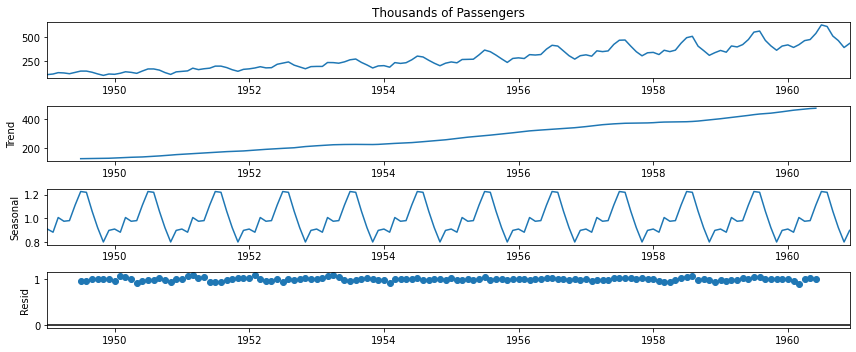

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5)
result.plot();

-----------------------------------------------------------------------------------------------------------------------

# <font color=red> SMA (Simple Moving Average)

In [36]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

<AxesSubplot:xlabel='Month'>

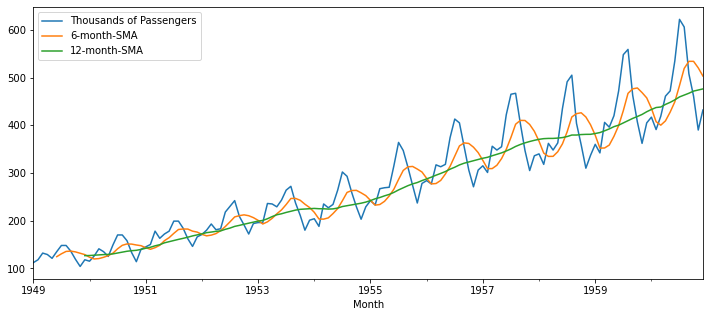

In [37]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot(figsize=(12,5))

<font color = green> <b> Basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

--------------------------------------------------------------------------------------------------------------------------

# <font color = Red> EWMA(Exponentially Weighted Moving Average )
    
EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
    

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$
    
Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.


* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [38]:
# EWMA
# Span is use to define the alpha, N-Day EW moving Average
# aplpa  = 2 /(span+1)

airline['EWMA'] = airline["Thousands of Passengers"].ewm(span=12).mean() # Span is 12 month

airline.tail()

Thousands of Passengers  6-month-SMA  12-month-SMA        EWMA
Month                                                                     
1960-08-01                      606   519.166667    463.333333  494.898620
1960-09-01                      508   534.000000    467.083333  496.914217
1960-10-01                      461   534.000000    471.583333  491.388952
1960-11-01                      390   520.333333    473.916667  475.790652
1960-12-01                      432   503.166667    476.166667  469.053629

<AxesSubplot:xlabel='Month'>

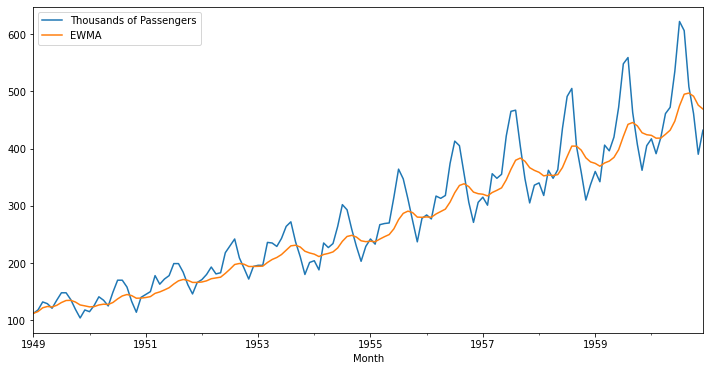

In [39]:
# Plot

airline[['Thousands of Passengers','EWMA']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Month'>

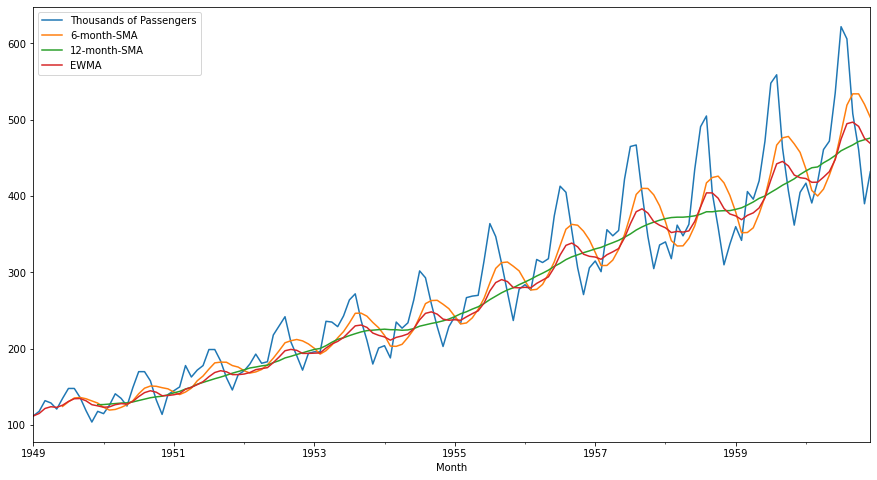

In [40]:
airline.plot(figsize=(15,8))

-----------------------------------------------------------------------------------------------------------------------

# <font color = Red>  Holt-Winters Methods

In [41]:
airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [42]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### <font color = green> Setting a DatetimeIndex Frequency
**Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.**

In [43]:
# Assinging the Offeset Aliases or Frequency to index

airline.index.freq  = 'MS'   # Monthly Freq
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## <font color = blue> Simple Exponential Smoothing

<b>A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [45]:
# Assinging the span and alpha

span = 12
alpha = 2/(span+1)

# Using .ewm() method
airline['EWMA12'] = airline["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

# Using Statsmodel
# Calculating the Simple Exp Smoothing using Statsmodel

model = SimpleExpSmoothing(airline["Thousands of Passengers"])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
airline['SES12'] = fitted_model.fittedvalues.shift(-1)
airline.head()

Thousands of Passengers      EWMA12       SES12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

<AxesSubplot:xlabel='Month'>

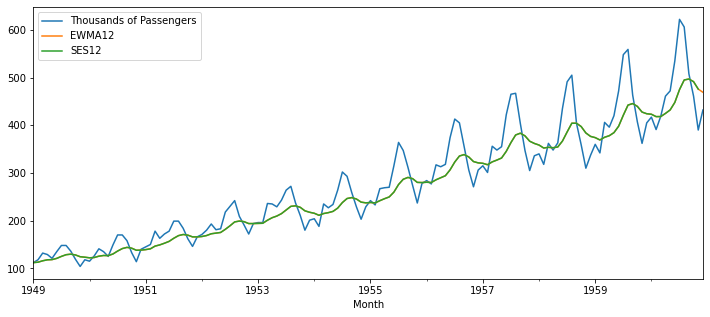

In [46]:
airline.plot(figsize=(12,5))

## <font color = Blue> Double Exponential Smoothing
    
Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<font color = green> <b> Additive Method

In [48]:
airline["DES-12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="add").fit().fittedvalues.shift(-1)
airline.head()

Thousands of Passengers      EWMA12       SES12      DES-12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.221156
1949-02-01                      118  112.923077  112.923077  120.175837
1949-03-01                      132  115.857988  115.857988  134.115056
1949-04-01                      129  117.879836  117.879836  131.244976
1949-05-01                      121  118.359861  118.359861  123.283465

<AxesSubplot:xlabel='Month'>

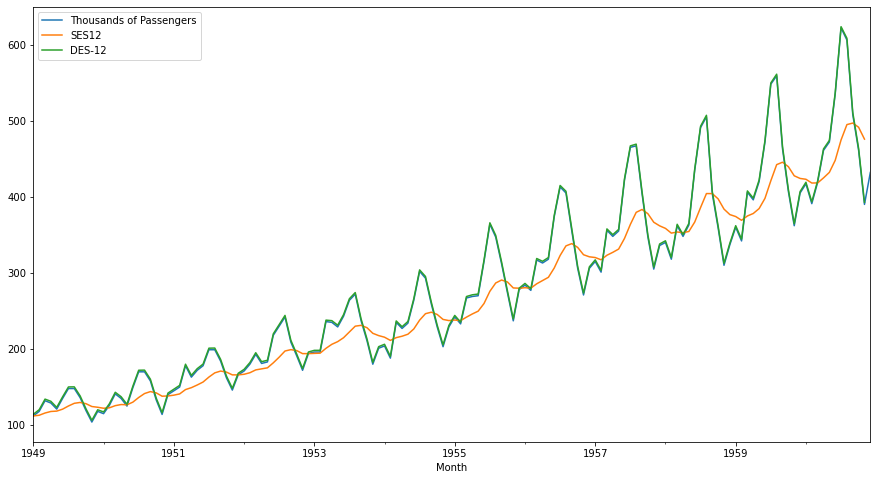

In [49]:
airline[['Thousands of Passengers', 'SES12', 'DES-12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

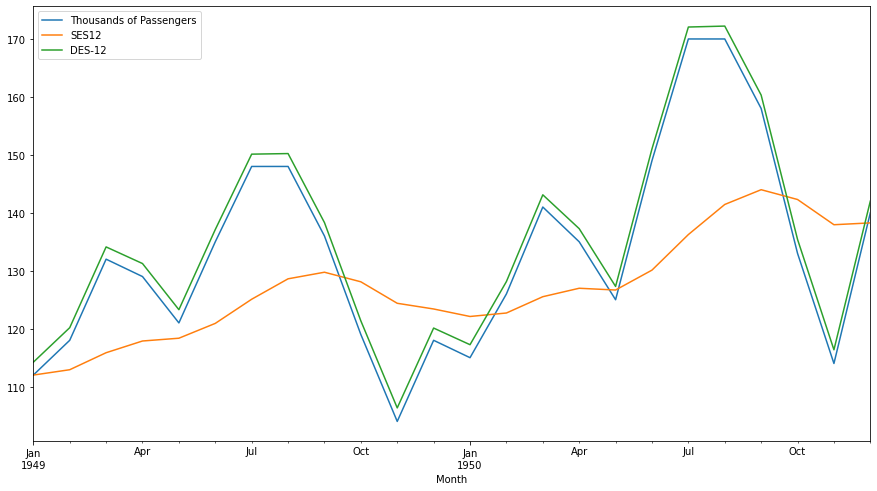

In [50]:
# Plotting the First 2 years of data
airline[['Thousands of Passengers', 'SES12', 'DES-12']].iloc[:24].plot(figsize=(15,8))

<font color = green> <b> Multiplicative Method

In [51]:
airline["DES-Mul=12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="mul").fit().fittedvalues.shift(-1)
airline.head()

Thousands of Passengers      EWMA12       SES12      DES-12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.221156   
1949-02-01                      118  112.923077  112.923077  120.175837   
1949-03-01                      132  115.857988  115.857988  134.115056   
1949-04-01                      129  117.879836  117.879836  131.244976   
1949-05-01                      121  118.359861  118.359861  123.283465   

            DES-Mul=12  
Month                   
1949-01-01  112.688538  
1949-02-01  118.725424  
1949-03-01  132.811491  
1949-04-01  129.793048  
1949-05-01  121.743867

<AxesSubplot:xlabel='Month'>

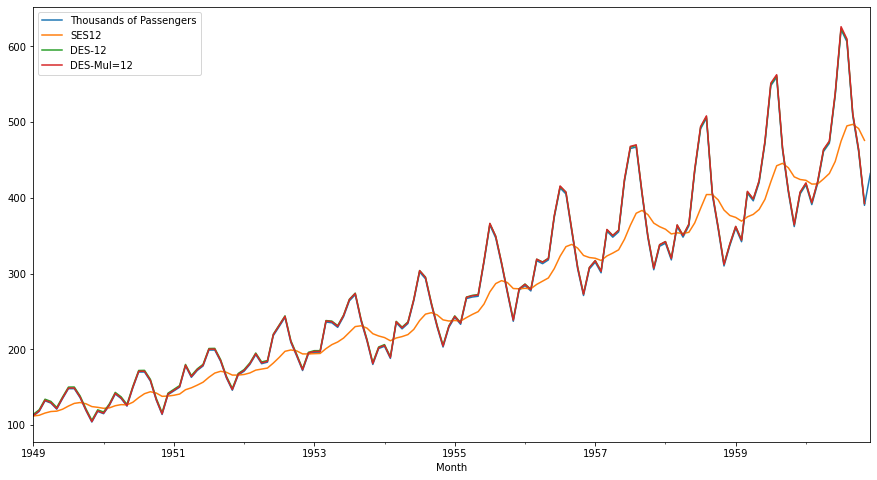

In [52]:
airline[['Thousands of Passengers', 'SES12', 'DES-12', 'DES-Mul=12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

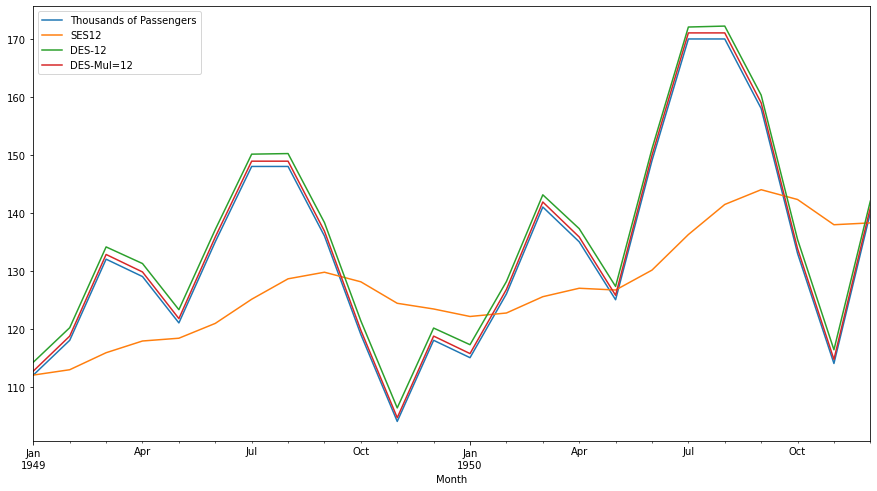

In [53]:
airline[['Thousands of Passengers', 'SES12', 'DES-12', 'DES-Mul=12']].iloc[:24].plot(figsize=(15,8))

## <font color = blue> Triple Exponential Smoothing
**Adds support for both trends and seasonality in the data.**
<strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.



In [54]:
airline["TES-Mul-12"] = ExponentialSmoothing(airline["Thousands of Passengers"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline.head()

Thousands of Passengers      EWMA12       SES12      DES-12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.221156   
1949-02-01                      118  112.923077  112.923077  120.175837   
1949-03-01                      132  115.857988  115.857988  134.115056   
1949-04-01                      129  117.879836  117.879836  131.244976   
1949-05-01                      121  118.359861  118.359861  123.283465   

            DES-Mul=12  TES-Mul-12  
Month                               
1949-01-01  112.688538  111.596793  
1949-02-01  118.725424  118.841794  
1949-03-01  132.811491  133.334074  
1949-04-01  129.793048  127.898917  
1949-05-01  121.743867  120.977474

<AxesSubplot:xlabel='Month'>

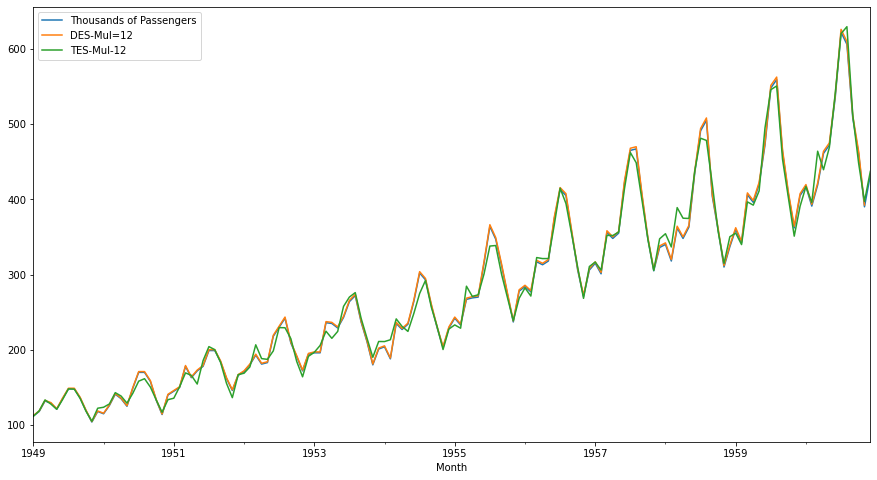

In [55]:
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

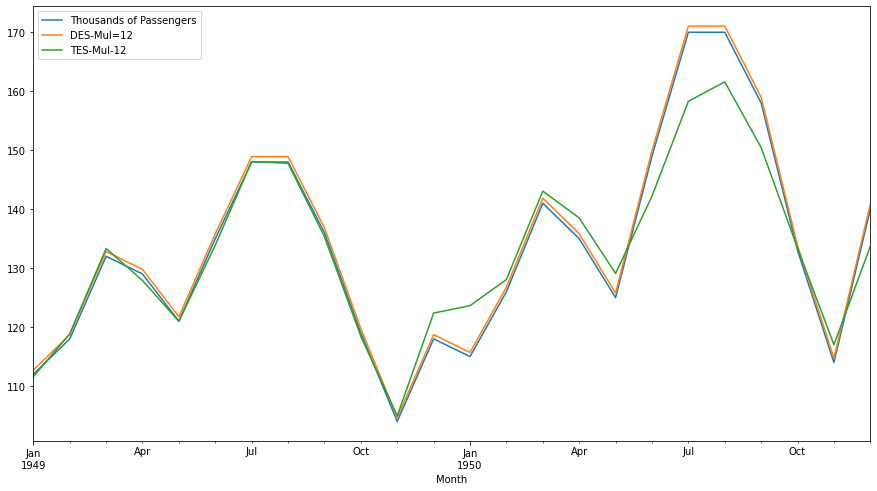

In [56]:
# First 2 years
# we can see below the DES is performing better the TES in early years of DATA.
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].iloc[:24].plot(figsize=(15,8))

<AxesSubplot:xlabel='Month'>

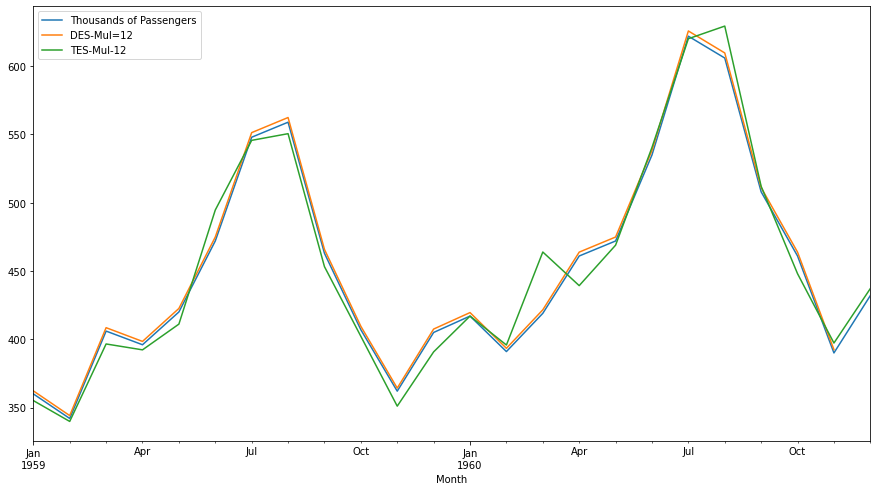

In [57]:
# Last 2 years
# TSE Improves hence can be used for forecasting the future values
airline[['Thousands of Passengers', 'DES-Mul=12','TES-Mul-12']].iloc[-24:].plot(figsize=(15,8))

___

# <font color = red>  Forcasting Procedure

- <font color = blue> <b> Choose a Model.
- <font color = blue> Split Data into Train and Test Data.
- <font color = blue> Fit Model on the training Data
- <font color = blue> Evaluate Model on the Test Data.
- <font color = blue>  Re-fit Model on the Entire Data.
- <font color = blue>  Forecast for the Future Data.

# <font color=red> Forecasting with the Holt-Winters Method
**For this example we'll use the same airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.**

In [58]:
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates= True)

In [59]:
airline.index
airline.index.freq = 'MS'
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

## <font color = blue> Train Test Split

- <b> Train and test split is done on the basis of time frame in TS data. Most recent data set is taken as Test data and the Data with earlier time stamp is taken as Train Data.

- The model is fit  on the Train data and the prediction will be done on the time frame of the Test data and the result of the Prediction were than comapre with the actual results of the Test Data.


In [60]:
train_data =  airline.iloc[:109]
test_data = airline.iloc[108:]

## <font color=blue> Fitting the Model On the Train Data

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [62]:
fitted_model = ExponentialSmoothing(train_data["Thousands of Passengers"], 
                                    trend='mul', seasonal='mul', seasonal_periods=12).fit()

## <font color = blue>Predicting for Test Data

In [63]:
#Forecast will take the no of periods we need to predict as argument
#no periods are in months, so if we need to predict for 3 years, we need to give input as 36 months.

test_prediction = fitted_model.forecast(36)   

test_prediction

1958-02-01    339.142839
1958-03-01    399.281567
1958-04-01    394.233518
1958-05-01    402.545212
1958-06-01    473.128729
1958-07-01    521.795258
1958-08-01    514.513564
1958-09-01    446.216722
1958-10-01    385.430842
1958-11-01    339.645012
1958-12-01    381.455551
1959-01-01    401.210071
1959-02-01    387.159060
1959-03-01    455.812296
1959-04-01    450.049538
1959-05-01    459.538011
1959-06-01    540.114821
1959-07-01    595.671611
1959-08-01    587.358966
1959-09-01    509.392582
1959-10-01    440.000570
1959-11-01    387.732331
1959-12-01    435.462452
1960-01-01    458.013840
1960-02-01    441.973470
1960-03-01    520.346708
1960-04-01    513.768052
1960-05-01    524.599914
1960-06-01    616.584878
1960-07-01    680.007460
1960-08-01    670.517902
1960-09-01    581.512951
1960-10-01    502.296340
1960-11-01    442.627906
1960-12-01    497.115710
1961-01-01    522.859949
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

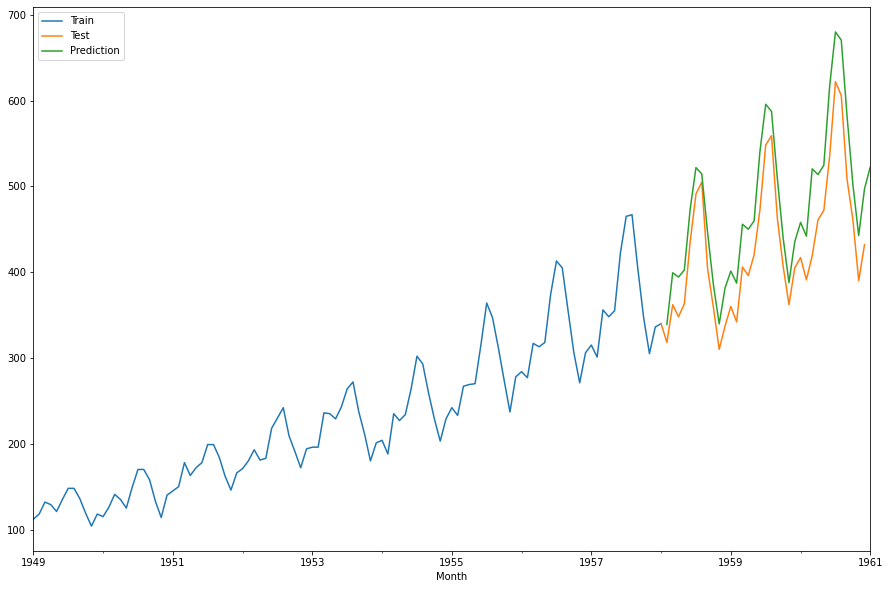

In [64]:
# Plot the Predicted and actual 

train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(15,10))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_prediction.plot(legend=True, label='Prediction')

<AxesSubplot:xlabel='Month'>

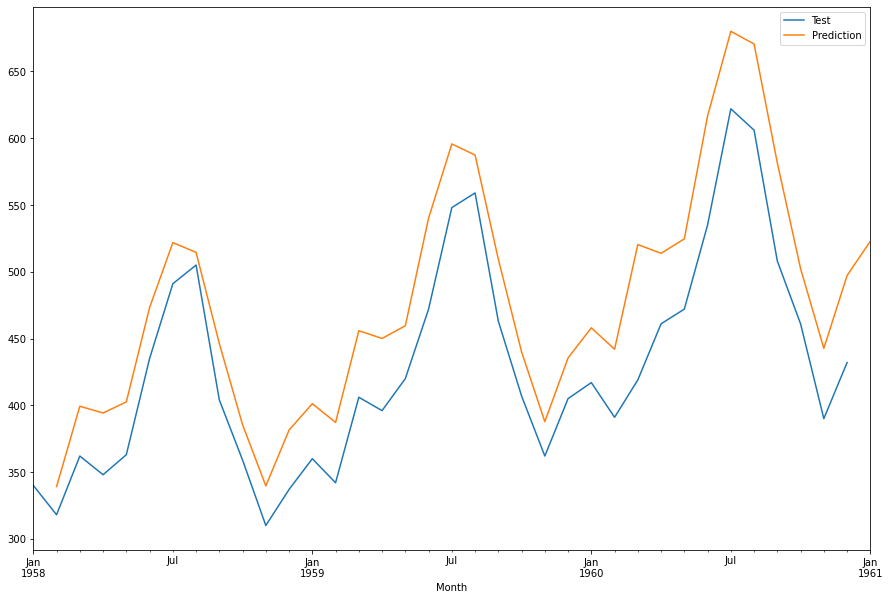

In [65]:
test_data['Thousands of Passengers'].plot(legend=True, label='Test', figsize=(15,10))
test_prediction.plot(legend=True, label='Prediction', xlim=['1958-01-01','1961-01-01'])

## <font color=blue> Evaluating The Prediction

- <b> Mean Absolute Error
- <b> Mean Squared Error
- <b> Root Mean Squared Error

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [67]:
print("Test Mean:",test_data.mean())
print("Test STD Dev", test_data.std())

Test Mean: Thousands of Passengers    428.5
dtype: float64
Test STD Dev Thousands of Passengers    79.329152
dtype: float64


In [68]:
mean_absolute_error(test_data, test_prediction)

63.031111382769595

In [69]:
mean_squared_error(test_data,test_prediction)

5614.2515044341835

In [70]:
# RMSE

np.sqrt(mean_squared_error(test_data,test_prediction))

74.92830909899264

## <font color=blue> Forcast The Future Values

In [71]:
final_model = ExponentialSmoothing(airline["Thousands of Passengers"], 
                                    trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [72]:
final_prediction = final_model.forecast(36)
final_prediction

1961-01-01    450.675302
1961-02-01    424.818510
1961-03-01    475.494744
1961-04-01    504.076271
1961-05-01    517.871918
1961-06-01    590.145478
1961-07-01    684.227074
1961-08-01    678.030847
1961-09-01    567.111774
1961-10-01    507.823777
1961-11-01    434.718565
1961-12-01    485.979996
1962-01-01    502.745789
1962-02-01    473.901535
1962-03-01    530.432840
1962-04-01    562.316643
1962-05-01    577.706222
1962-06-01    658.330184
1962-07-01    763.281855
1962-08-01    756.369723
1962-09-01    632.635192
1962-10-01    566.497131
1962-11-01    484.945430
1962-12-01    542.129545
1963-01-01    560.832438
1963-02-01    528.655553
1963-03-01    591.718418
1963-04-01    627.286037
1963-05-01    644.453711
1963-06-01    734.392868
1963-07-01    851.470530
1963-08-01    843.759780
1963-09-01    705.729109
1963-10-01    631.949534
1963-11-01    540.975447
1963-12-01    604.766547
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

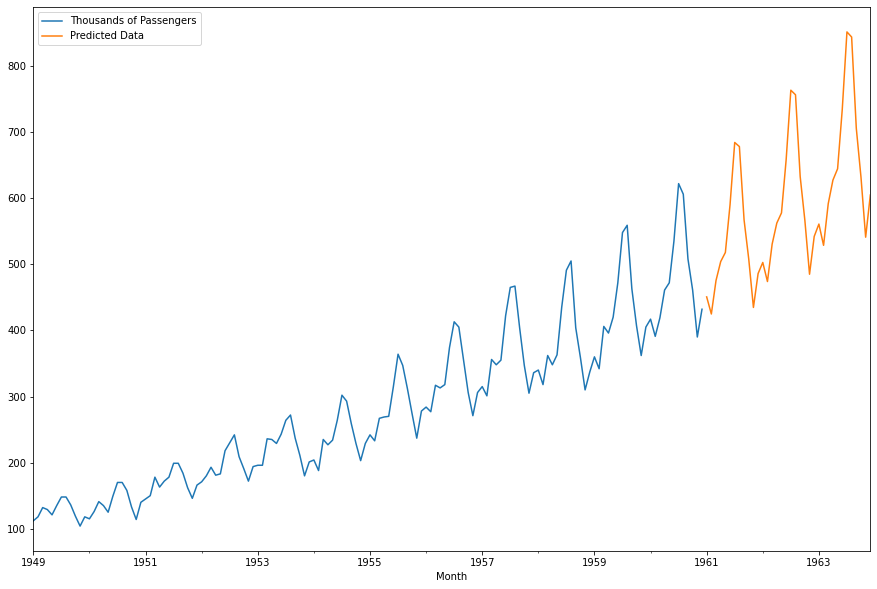

In [73]:
# Ploting the forcast vs Given Data
airline.plot(legend=True, label='Actual Data',figsize=(15,10))
final_prediction.plot(legend=True, label='Predicted Data', figsize=(15,10))

___

# <font color = Red>Stationarity
<b>Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.


In [74]:
df = pd.read_csv("Data/samples.csv", index_col='Unnamed: 0', parse_dates=True)
df.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

<AxesSubplot:>

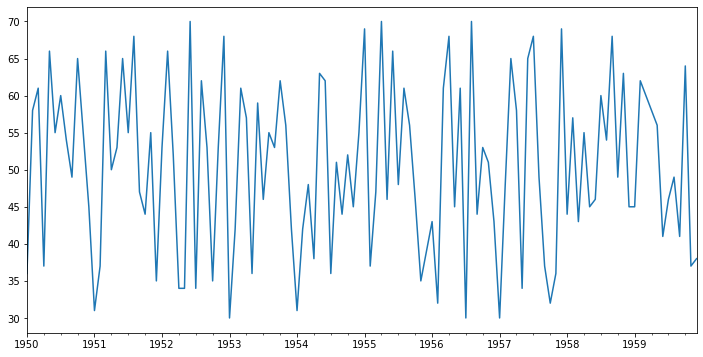

In [75]:
# Stationary Data

df['a'].plot(figsize=(12,6))

<AxesSubplot:>

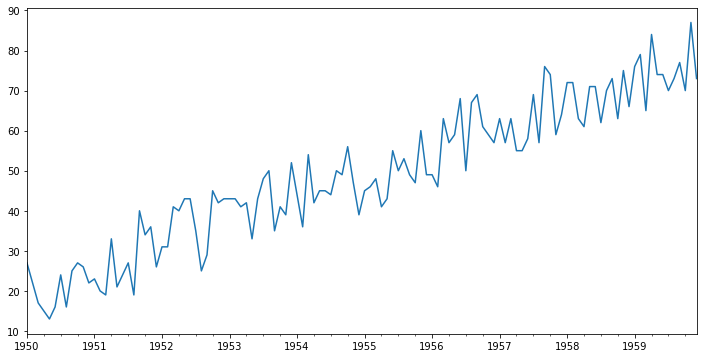

In [76]:
# Non Stationary Data
# Shows Trend

df['b'].plot(figsize=(12,6))

# <font color=red> Differencing
    
## <font color = blue> First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$




In [77]:
from statsmodels.tsa.statespace.tools import diff

<AxesSubplot:>

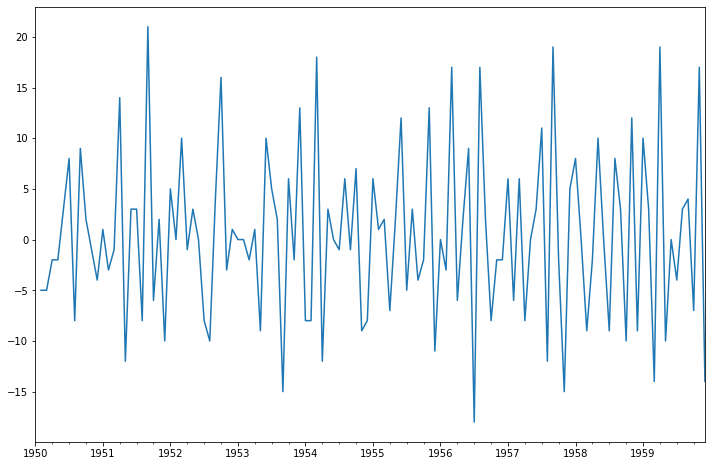

In [78]:
(df['b'] - df['b'].shift(1)).plot(figsize=(12,8))

<AxesSubplot:>

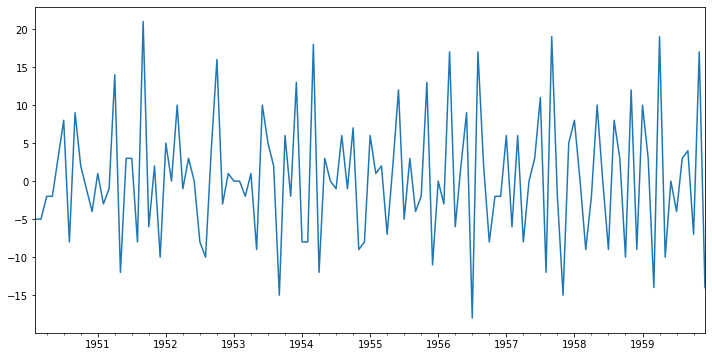

In [79]:
# Using Diff method

diff(df['b'],k_diff=1).plot(figsize=(12,6))

### <font color = blue> Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

In [80]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df[['b']].tail(3)

b
1959-10-01  70
1959-11-01  87
1959-12-01  73

<b>Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [81]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

Fcast
1960-01-01      7
1960-02-01     -2
1960-03-01      5
1960-04-01     -1
1960-05-01     12

<font color = green> <b> The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [82]:
z['forecast']=df['b'].iloc[-1] + z['Fcast'].cumsum()
z

Fcast  forecast
1960-01-01      7        80
1960-02-01     -2        78
1960-03-01      5        83
1960-04-01     -1        82
1960-05-01     12        94

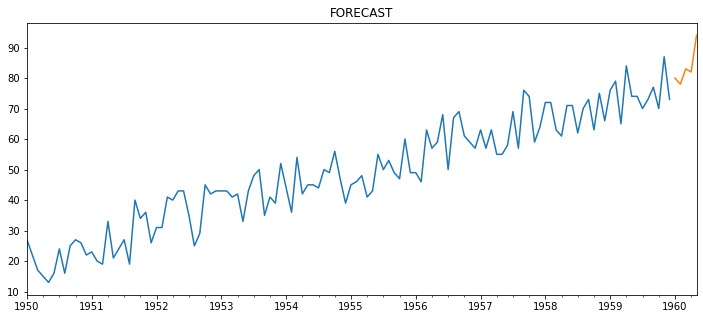

In [83]:
df['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

___

# <font color = red> Auto Correlation Function (ACF)

- <b> An ACF shows the correlation of the series with itself, lagged by x time units, that Includes direct or indirect dependence information.
- <b> USe to determine the term use in MA model

# <font color=red> Partial Auto Correaltion Function (PACF)

- <b> coorelation of the series with itself lagged by x timer units after removing effect of intervening variables, that only includes drirect dependence information.
- <b> Use to determine the term used in AR model.

In [84]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [85]:
# Loading the non stationary Data

airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.index.freq = 'MS'
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [86]:
# Stationary Data

Fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
Fem_birth.index.freq = 'D'
Fem_birth.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

## <font Color = blue> ACF

In [87]:
# ACF using Stats Model

acf(airline['Thousands of Passengers'])   # Default lags is 40

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [88]:
acf(Fem_birth["Births"])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

## <font color =  blue> PACF

In [89]:
# Using Yule-walker formula

pacf_yw(airline['Thousands of Passengers'], method= 'mle',)

array([ 1.        ,  0.94804734, -0.22942187,  0.03814778,  0.09378544,
        0.0736067 ,  0.0077276 ,  0.12559713,  0.08995134,  0.23248854,
        0.16605126,  0.17127442, -0.1354311 , -0.53969124, -0.02661014,
        0.09076498,  0.02495556,  0.03251557,  0.07343264,  0.04844211,
       -0.04554168,  0.04575294, -0.10017888,  0.05243494,  0.04801413,
       -0.16274616, -0.03613503,  0.06642377,  0.00617612,  0.00753714,
        0.01935049, -0.01025146, -0.01831018, -0.02900136, -0.01480497,
       -0.0477246 ,  0.04620366, -0.0666976 , -0.00229644,  0.0160981 ,
       -0.08833969])

In [90]:
pacf_yw(Fem_birth['Births'], nlags=40, method='mle')

array([ 1.        ,  0.21724118,  0.11091851,  0.05800643,  0.04543103,
        0.05504982,  0.04617438,  0.15648712,  0.05939139, -0.02509098,
       -0.00890434,  0.00618762, -0.06821152,  0.00494821,  0.05147711,
        0.06574724,  0.02287367, -0.02919993,  0.05161131,  0.05139698,
        0.0633241 ,  0.22244509,  0.01256544, -0.05614002,  0.0324189 ,
       -0.02083772, -0.00113261,  0.07414523,  0.04841523,  0.00484985,
        0.03987566,  0.03980956, -0.01241855,  0.02299   ,  0.01444347,
       -0.0390127 ,  0.02148661,  0.0136852 ,  0.04949612,  0.06401633,
       -0.00526597])

In [91]:
# Using OLS Method

pacf_ols(airline['Thousands of Passengers'])

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

## <font color=Blue>  Plotting ACF and PACF
    
<b> The arrays returned by <tt>.acf(df)</tt> and <tt>.pacf_yw(df)</tt> show the magnitude of the autocorrelation for a given $y$ at time $t$. Before we look at plotting arrays, let's look at the data itself for evidence of autocorrelation.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way. Let's look at the <strong>Airline Passengers</strong> dataset first.

In [92]:
from pandas.plotting import lag_plot

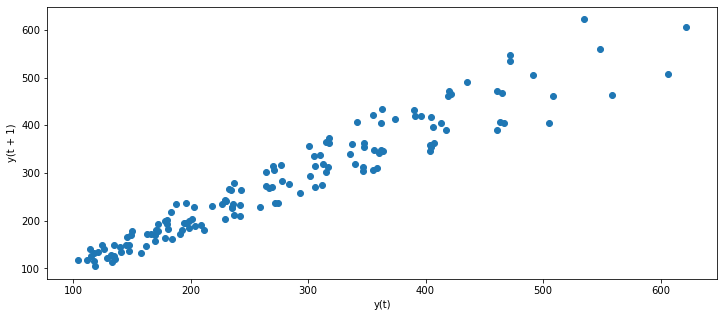

In [93]:
# Plotting the non stationary Data

lag_plot(airline["Thousands of Passengers"]);

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

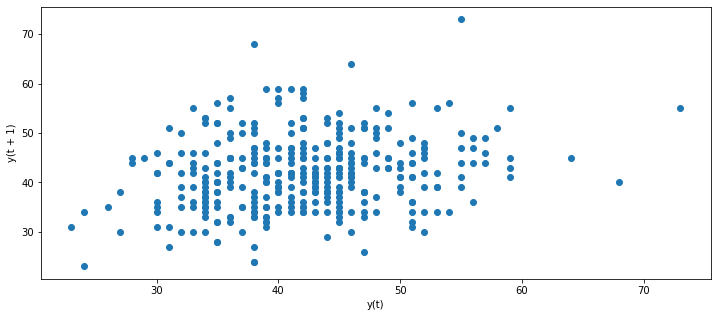

In [94]:
# Plotting the Stationary Data

lag_plot(Fem_birth["Births"])

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

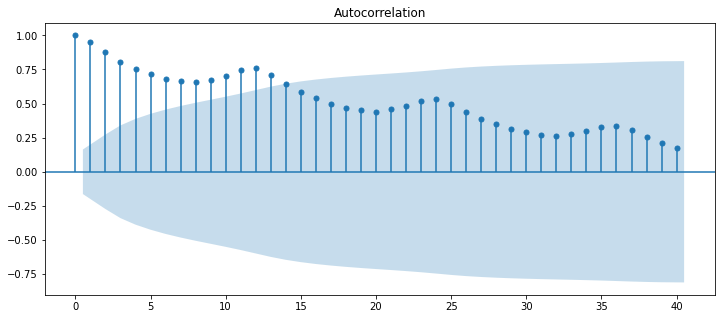

In [96]:
# Plotting ACF plot for Non Stationary Data


plot_acf(airline, lags=40,);

<font color = green> <b> Shaded region represent the 95% Confidence Interval. It suggest that the correlation value outside the Shaded Region are highly likely to be the correlation.
       The shaded Region become larger as you lags increases.

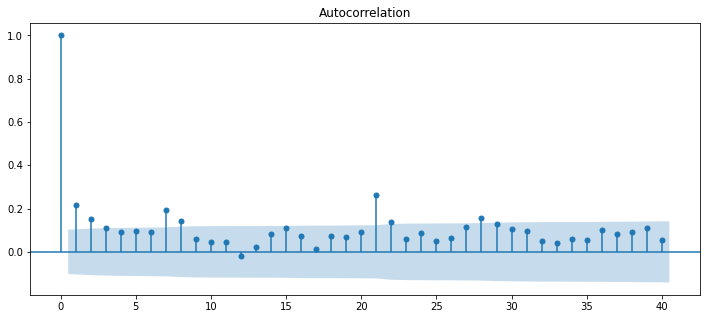

In [97]:
# ACF on the Stationary Data

plot_acf(Fem_birth, lags=40);

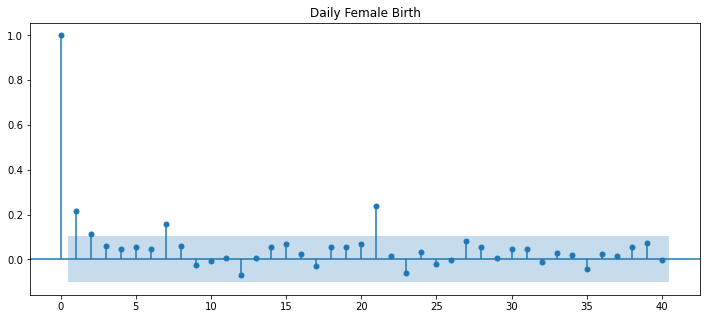

In [98]:
#Ploting PACF

plot_pacf(Fem_birth, lags=40, title="Daily Female Birth");

___

# <font color= red> Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a unit root hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The augmented Dickey-Fuller is test for Stationarity

## <font color = blue> Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the augmented Dickey-Fuller Test. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

<AxesSubplot:xlabel='Month'>

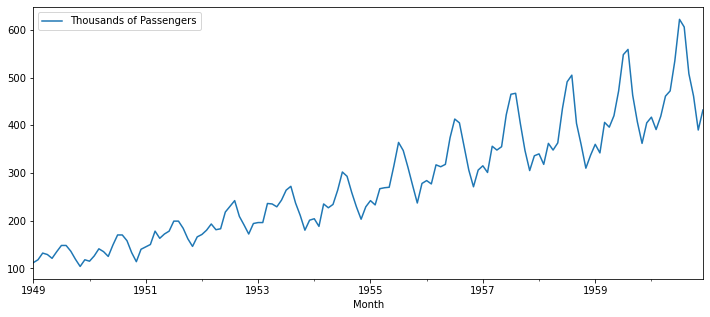

In [99]:
# Importing the seasonal Data

airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.index.freq = 'MS'

# Ploting the Non Stationary Data

airline.plot()

<AxesSubplot:xlabel='Date'>

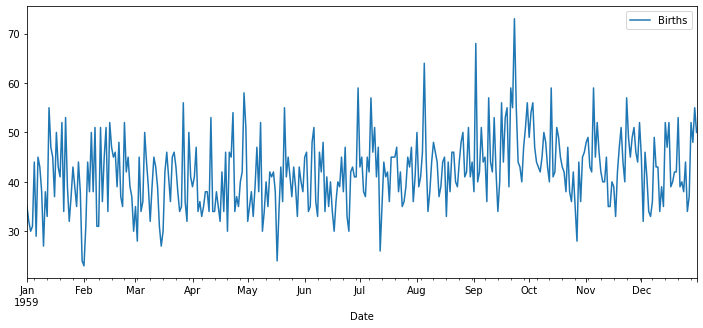

In [100]:
# Importing the Non seasonal Data

fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
fem_birth.index.freq = 'D'

# Ploting the Stationary Data

fem_birth.plot()

In [101]:
# Import in adfuller from the stats model

from statsmodels.tsa.stattools import adfuller

In [102]:
# Runnning on Airline data

adfuller(airline['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [103]:
# Usning the help to see what paramenters are return by the adfuller test

help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {"c","ct","ctt","nc"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "nc" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if "AIC" (default) or 

In [104]:
# Interpreting the adfuller test results

dftest = adfuller(airline['Thousands of Passengers'])

dfout = pd.Series(dftest[0:4], index=['ADF Test-Statistic', 'p-Value', '# of Lag Used', '# of Observation'])

In [105]:
dfout

ADF Test-Statistic      0.815369
p-Value                 0.991880
# of Lag Used          13.000000
# of Observation      130.000000
dtype: float64

In [106]:
dftest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [107]:
# Adding the critcal value to dfout

for key,val in dftest[4].items():
    dfout[f"Critical Value ({key})"] = val
    
    
# Ducky fuller test for The Airline Dataset
print('Augmented Dickey-Fuller Test on Airlines Passenger')
dfout
    

Augmented Dickey-Fuller Test on Airlines Passenger


ADF Test-Statistic        0.815369
p-Value                   0.991880
# of Lag Used            13.000000
# of Observation        130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64

In [108]:
# APplying the Dicky fuller test on Strationary Data Fem_birth

print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest1 = adfuller(fem_birth['Births'],autolag='AIC')
dfout1 = pd.Series(dftest1[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest1[4].items():
    dfout1[f'critical value ({key})']=val
print(dfout1)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [109]:
# Creating A generalus function to Run a Dicky fuller test on any data set

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [110]:
#  Airline Data

adf_test(airline['Thousands of Passengers'], 'Airline Passenger Dataset' )

Augmented Dickey-Fuller Test: Airline Passenger Dataset
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [111]:
# Female birth Data

adf_test(fem_birth['Births'], "Daily Female Births Data Set")

Augmented Dickey-Fuller Test: Daily Female Births Data Set
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


___

## <font color = blue> Ggranger Causality Test

TheGranger causality test is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

In [112]:
# Importing the data set

sample = pd.read_csv("Data/samples.csv", index_col=0, parse_dates=True)
sample.index.freq = 'MS'
sample.head()

a   b  c   d
1950-01-01  36  27  0  67
1950-02-01  58  22  3  31
1950-03-01  61  17  5  67
1950-04-01  37  15  8  47
1950-05-01  66  13  8  62

<AxesSubplot:>

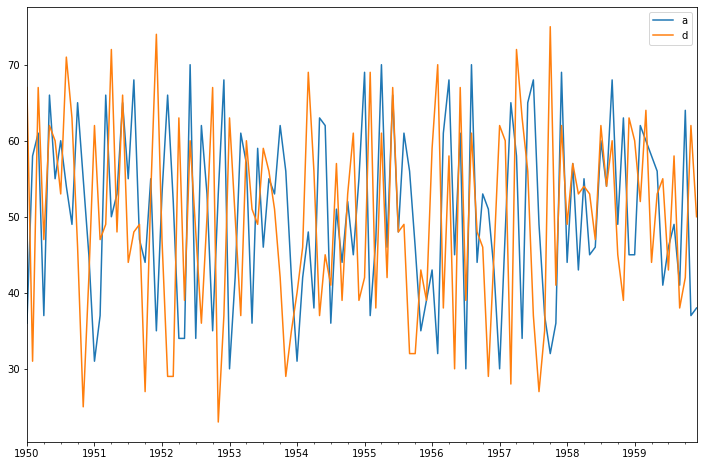

In [113]:
# Plotting the column a and d

sample[['a','d']].plot(figsize=[12,8])

<font color = green> <b> Just by visualisation we can see if there is any causality between a and d

<AxesSubplot:>

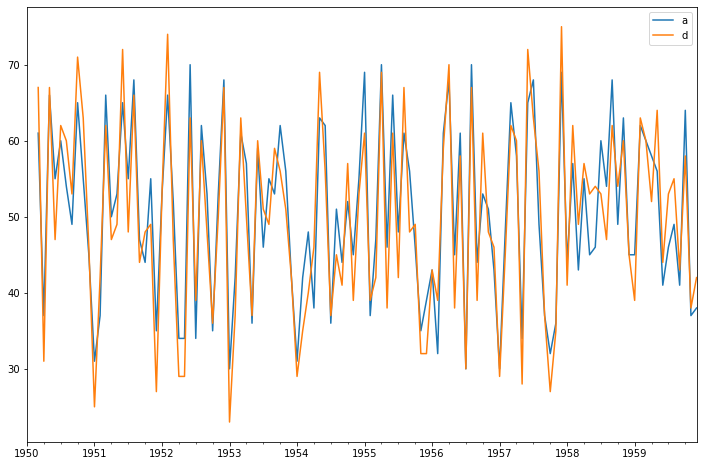

In [114]:
# Just by shiffting bot the columns we can see the causality

sample['a'].iloc[2:].plot(figsize=(12,8), legend = True)
sample['d'].shift(2).plot(legend= True)

<font color =green> <b> Just by shifting both the column we can see the clear pattern on causality in a and d

<font color = green> <b> In normal situation it is very hard to predict the shift in the TS to find the causality. So we use Ganger-Causality Test for the Check.

In [115]:
from statsmodels.tsa.stattools import grangercausalitytests

In [116]:
grangercausalitytests(sample[['a','d']], maxlag=3 );  

# maxlags will take input as a maximum lags user wants to check for causality

# Will check for the p-value less than 0.05
# Below for lag 2 p value is less than 0.05, hence there causality between a and d


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


<b>Essentially we're looking for extremely low p-values, which we see at lag 2.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.<b>

In [117]:
#checking the other dataset for causality
grangercausalitytests(sample[['b','d']], maxlag=3 );  

# for lag 2 and 3 p-vlaue is same ie greater than 0.05, hence there is no causality between b and d


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


___

# <font color = red> AR(p)  Autoregressive Model
In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.



In [118]:
from statsmodels.tsa.ar_model import AR, ARResults

In [119]:
us_pop = pd.read_csv("Data/uspopulation.csv", index_col="DATE", parse_dates=True)
us_pop.index.freq = "MS"
us_pop.tail()

PopEst
DATE              
2018-08-01  327698
2018-09-01  327893
2018-10-01  328077
2018-11-01  328241
2018-12-01  328393

<AxesSubplot:xlabel='DATE'>

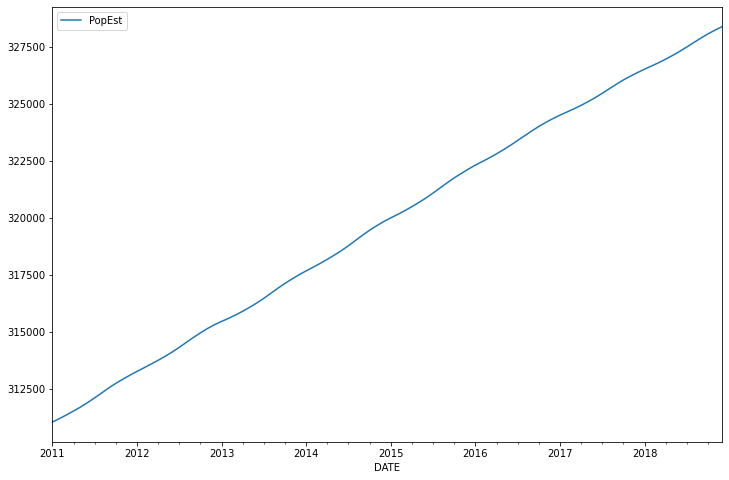

In [120]:
# Ploting the Popoulation

us_pop.plot(figsize=(12,8))

In [121]:
# Length of the DataFrame
len(us_pop)

96

In [122]:
# Dividnig the Data in Train and Test set

train_pop = us_pop.iloc[:84]
test_pop = us_pop.iloc[84:]    # Taking 1 year as a Test Data

In [123]:
# Training the the AR model

model = AR(train_pop['PopEst'])

In [124]:
# FItitng the AR1 Model

AR1fit = model.fit(maxlag=1)   # maxlag will take the input as no of lag u need to perform on the data

In [125]:
# Paramenters of the AR1 model

AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [126]:
start=len(train_pop)
end=len(train_pop)+len(test_pop)-1

In [127]:
end

95

In [128]:
# Predicting on the Test Data

prediction1 = AR1fit.predict(start,end).rename("AR1-Predictions")

prediction1


2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR1-Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

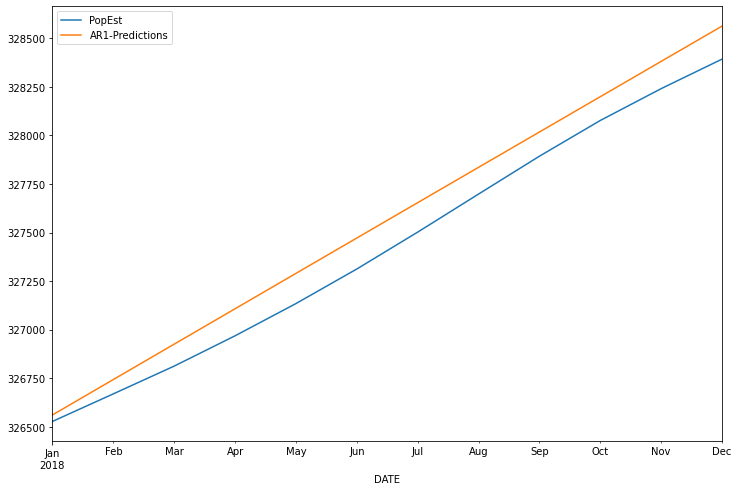

In [129]:
test_pop.plot(figsize=(12,8), legend = True)
prediction1.plot(legend=True)

In [130]:
# Training the DAta with AR(2 model)

model1 = AR(train_pop['PopEst'])
AR2fit = model1.fit(maxlag=2)

In [131]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [132]:
prediction2 = AR2fit.predict(start,end).rename("AR2-Prediction")

<AxesSubplot:xlabel='DATE'>

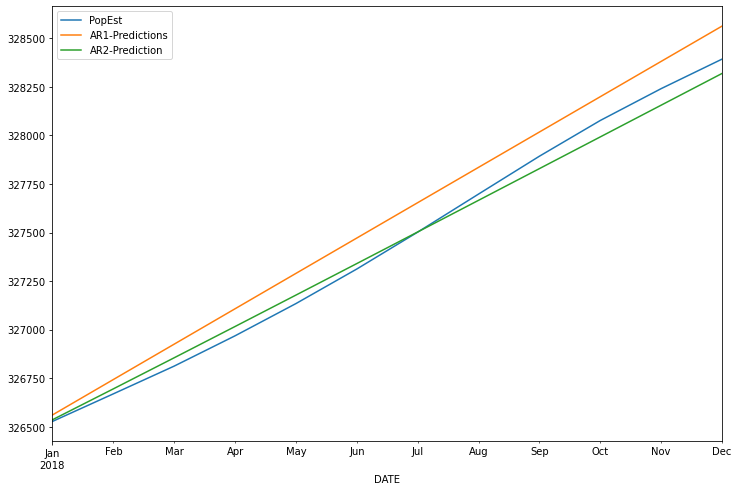

In [133]:
test_pop.plot(figsize=(12,8), legend = True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)

<font color = green> <b> AR(2) is predicting much better than AR(1) model

In [134]:
# Finding the best value of P for the AR model

model2 = AR(train_pop['PopEst'])
AR_fit = model2.fit(ic='t-stat')

In [135]:
AR_fit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [136]:
prediction8 = AR_fit.predict(start,end).rename("AR8-Predictions")

In [137]:
# Evaluating the AR model

from sklearn.metrics import mean_squared_error

In [138]:
labels = ['AR1', 'AR2', 'AR8']
preds = [prediction1, prediction2, prediction8]

In [139]:
for i in range(3):
    error = mean_squared_error(test_pop['PopEst'], preds[i])
    print(f"{labels[i]} MSE was: {error}")

AR1 MSE was: 17449.714239577344
AR2 MSE was: 2713.258615675103
AR8 MSE was: 186.97058618962419


<AxesSubplot:xlabel='DATE'>

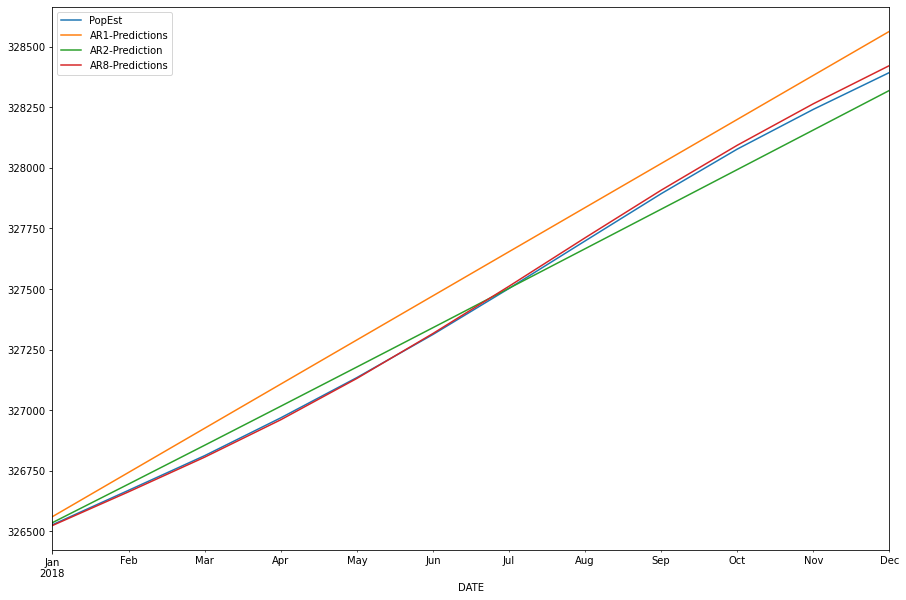

In [140]:
# Ploting All AR model with the Test data
test_pop.plot(figsize=(15,10), legend = True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)
prediction8.plot(legend=True)

### <font color=blue> Forcasting the Future

In [141]:
# Training the WHole Data Set

model3 = AR(us_pop['PopEst'])

AR_fut = model3.fit(ic='t-stat')

forcasted_values = AR_fut.predict(start= len(us_pop)-1, end= len(us_pop)+12).rename("Forcasted_Values")

In [142]:
AR_fut.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

<AxesSubplot:xlabel='DATE'>

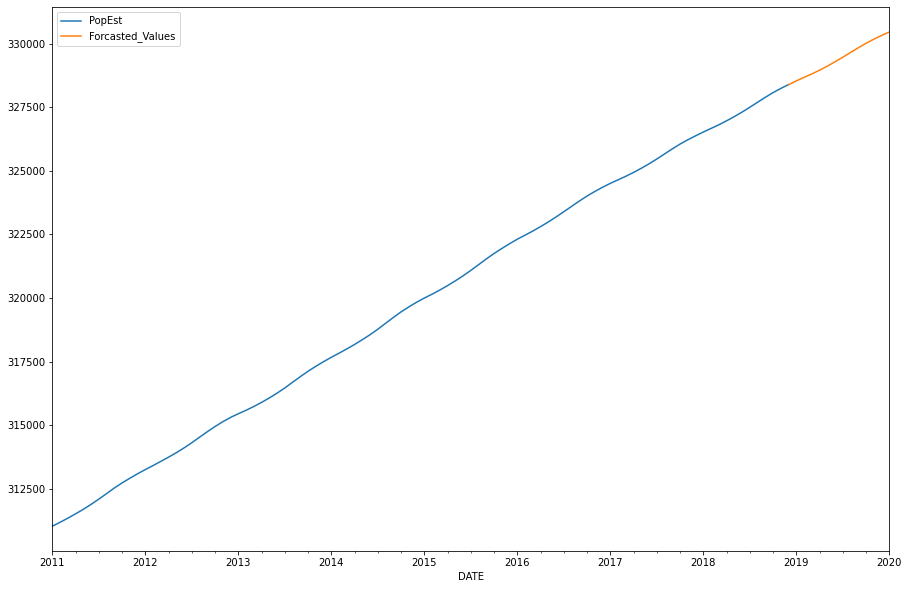

In [143]:
# Ploting the Forecasted values

us_pop.plot(figsize=(15,10), legend = True)
forcasted_values.plot(legend=True)

___

# <font color=Red> Choosing ARIMA Orders

ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.




In [144]:
# Importing the non- stationary Data

airline = pd.read_csv("Data/airline_passengers.csv", index_col='Month', parse_dates=True)
airline.index.freq = 'MS'
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [145]:
# Importing the Stationary Data

fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
fem_birth.index.freq = 'D'
fem_birth.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

In [146]:
from pmdarima import auto_arima

In [147]:
# About Auto Arima function

help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


<font color = Blue> <b> Perfroming the Auto ARIMA model on the Staionary Data Set.
- We are not using the Train Test split to know the best model parameters, instead we are using AIC paramenter to let us find  the best ARIMA model

In [148]:
# Performing the stepwise fit on the Stationary data set: Daily female birth Data Set

stepwise_fit_fem_birth = auto_arima(fem_birth['Births'],
                                    start_p=0, start_q=0, max_p=6, max_q=3,
                                    seasonal=False, trace=False)
# Trace: by default False, But if true will show the intial best fit ARIMA models
# AS per the input auto arima will check 6X3 18 combination of models, But while using AIC paramenter for performance
# and optimisation later complex model where AIC score is not changing Auto Arima will ignore these models.

In [149]:
auto_arima(fem_birth['Births'],start_p=0, start_q=0, max_p=6, max_q=3,seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.992, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [150]:
# Summary OF the best fit ARIMA model

stepwise_fit_fem_birth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 03 Feb 2021   AIC                           2459.074
Time:                        22:29:00   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
# Performing the stepwise fit on the non Stationary data set: Airlines Passenger Data Set

stepwise_fit_Airline = auto_arima(airline['Thousands of Passengers'], 
                                  start_p=0, start_q=0, max_p=4, max_q=4, 
                                  seasonal=True, trace=True, m=12)

# m is seasonlity paramenter, 1: monthluy, 4: quaterly, 12: yearly)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.09 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.16 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.10 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.76 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [152]:
# Summary of the best fit SARIMA Model

stepwise_fit_Airline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 03 Feb 2021   AIC                           1019.178
Time:                                     22:29:07   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

___

# <font color=red>ARMA(p,q) and ARIMA(p,d,q)


In [153]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [154]:
# Impoting the Data sets

In [155]:
# Daily Female Bith Data Set

fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
fem_birth.index.freq = 'D'

#Taking only the first 4 months Data, To remove the Seasionality componnent, To be Fit in ARMA Model
fem_birth = fem_birth.iloc[:120]


In [156]:
# Trade Inventories Data

trade_invnt =  pd.read_csv("Data/TradeInventories.csv", index_col='Date', parse_dates=True)
trade_invnt.index.freq = 'MS'

## <font color = blue> ARMA

<AxesSubplot:xlabel='Date'>

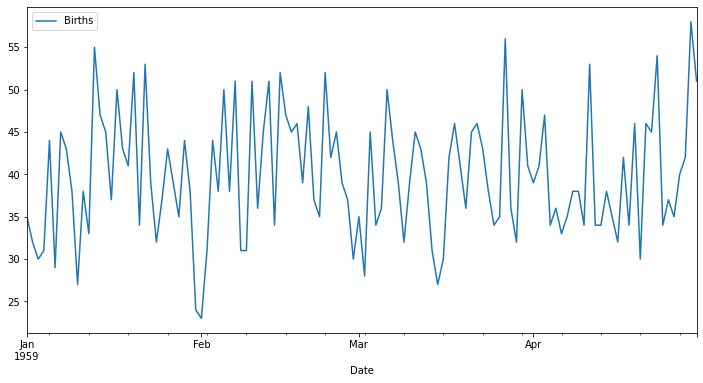

In [157]:
# Ploting The female Birth Rate Data Set

fem_birth.plot(figsize=(12,6))

In [158]:
# Performaing a ADF test on fem_bith Data
# For Reference Function Is Defined In the segemnt containing ADF explanation

adf_test(fem_birth['Births'], "Daily Female Birth Rate")

Augmented Dickey-Fuller Test: Daily Female Birth Rate
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [159]:
# Perfornming Auto ARIMA on the Data set

auto_arima(fem_birth['Births'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.738 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

**Train-Test SPlit**

In [160]:
fem_birth_train = fem_birth.iloc[:90]
fem_birth_test = fem_birth.iloc[90:]

In [161]:
# performing the ARMA(2,2) model

model = ARMA(fem_birth_train['Births'], order=(1,1))
results =  model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(1, 1)   Log Likelihood                -307.967
Method:                       css-mle   S.D. of innovations              7.410
Date:                Wed, 03 Feb 2021   AIC                            623.934
Time:                        22:29:26   BIC                            633.934
Sample:                    01-01-1959   HQIC                           627.967
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7561      0.907     43.817      0.000      37.978      41.534
ar.L1.Births     0.4879      0.810      0.603      0.547      -1.099       2.075
ma.L1.Births    -0.4038      0.845     -0.478      0.633      -2.060       1.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0497           +0.0000j            2.0497            0.0000
MA.1            2.4766           +0.0000j            2.4766            0.0000
-----------------------------------------------------------------------------
"""

In [162]:
# Predicting on the Test Data

start = len(fem_birth_train)
end = len(fem_birth_train) + len(fem_birth_test) - 1  #Removing Indexing Out POF bound Error

predictions = results.predict(start, end).rename("ARMA(2,2)-Predictions")

predictions

# All the Prediction a hovering arround the mean

1959-04-01    40.111449
1959-04-02    39.929452
1959-04-03    39.840659
1959-04-04    39.797340
1959-04-05    39.776205
1959-04-06    39.765894
1959-04-07    39.760863
1959-04-08    39.758409
1959-04-09    39.757212
1959-04-10    39.756627
1959-04-11    39.756342
1959-04-12    39.756203
1959-04-13    39.756136
1959-04-14    39.756102
1959-04-15    39.756086
1959-04-16    39.756078
1959-04-17    39.756075
1959-04-18    39.756073
1959-04-19    39.756072
1959-04-20    39.756071
1959-04-21    39.756071
1959-04-22    39.756071
1959-04-23    39.756071
1959-04-24    39.756071
1959-04-25    39.756071
1959-04-26    39.756071
1959-04-27    39.756071
1959-04-28    39.756071
1959-04-29    39.756071
1959-04-30    39.756071
Freq: D, Name: ARMA(2,2)-Predictions, dtype: float64

<AxesSubplot:xlabel='Date'>

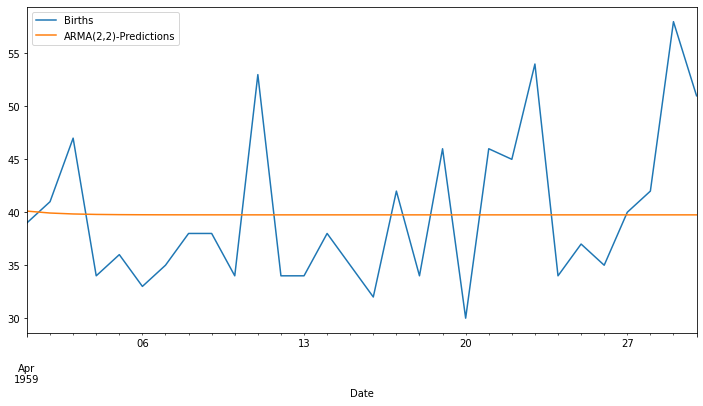

In [163]:
# Plotting the Test data vs Prediction

fem_birth_test['Births'].plot(figsize=(12,6), legend=True)
predictions.plot(legend=True)

In [164]:
# Comparing the Mean of Test and Predicted Values

print("Mean Of Test Data: ", fem_birth_test.mean())
print("Mean Of Predicted Data: ", predictions.mean())

Mean Of Test Data:  Births    39.833333
dtype: float64
Mean Of Predicted Data:  39.77920197715276


___
## <font color=blue> Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.

In [165]:
trade_invnt.head()

Inventories
Date                   
1997-01-01      1301161
1997-02-01      1307080
1997-03-01      1303978
1997-04-01      1319740
1997-05-01      1327294

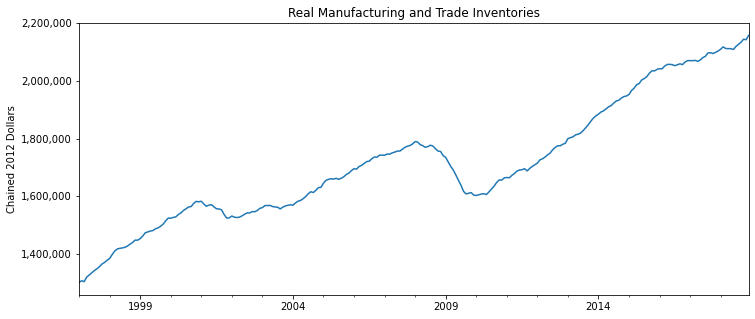

In [166]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = trade_invnt['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

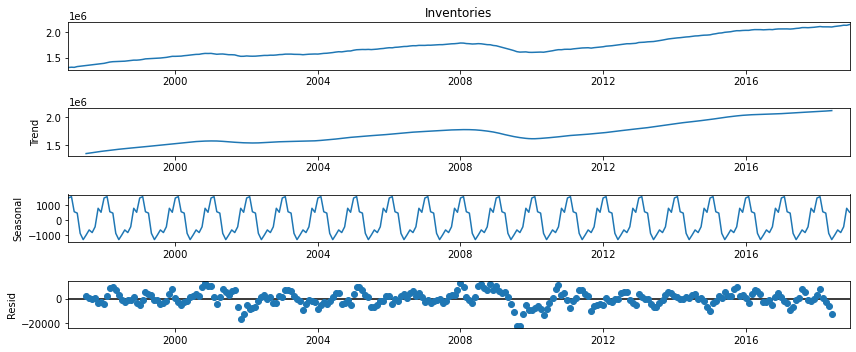

In [167]:
# Running the ETS Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(trade_invnt['Inventories'], model='additive')  # model='add' also works
result.plot();

In [168]:
auto_arima(trade_invnt['Inventories'],seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5373.961, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.516 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 03 Feb 2021   AIC                           5348.037
Time:                        22:29:40   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
# Running the ADF Test
adf_test(trade_invnt["Inventories"], "Real Manufacturing and Trade Inventories")

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [170]:
#Run the augmented Dickey-Fuller Test on the First Difference

from statsmodels.tsa.statespace.tools import diff
trade_invnt['d1'] = diff(trade_invnt['Inventories'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(trade_invnt['d1'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


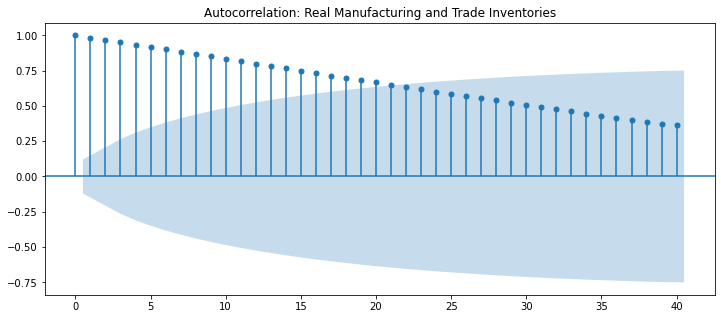

In [171]:
#Run the ACF and PACF plots

title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(trade_invnt['Inventories'],title=title,lags=lags);

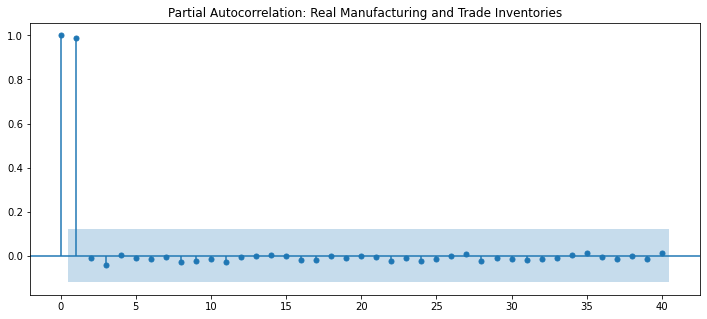

In [172]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(trade_invnt['Inventories'],title=title,lags=lags);

<font color=green> <b> This tells us that the AR component should be more important than MA.<br>
If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.</em><br> 

In [173]:
stepwise_fit = auto_arima(trade_invnt['Inventories'].dropna(), start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.188 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 03 Feb 2021   AIC                           5348.037
Time:                        22:29:54   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<b> Train Test Split

In [174]:
# Set one year for testing
train = trade_invnt.iloc[:252]
test = trade_invnt.iloc[252:]

In [175]:
# Fit and Training the Model

model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.007
Date:                Wed, 03 Feb 2021   AIC                           4980.788
Time:                        22:29:57   BIC                           4994.890
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3236.6743   1344.956      2.407      0.016     600.610    5872.739
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

In [176]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [177]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2107156.932, expected=2110158
predicted=2110546.374, expected=2118199
predicted=2113920.93 , expected=2112427
predicted=2117282.052, expected=2112276
predicted=2120631.049, expected=2111835
predicted=2123969.102, expected=2109298
predicted=2127297.277, expected=2119618
predicted=2130616.537, expected=2127170
predicted=2133927.751, expected=2134172
predicted=2137231.702, expected=2144639
predicted=2140529.097, expected=2143001
predicted=2143820.577, expected=2158115


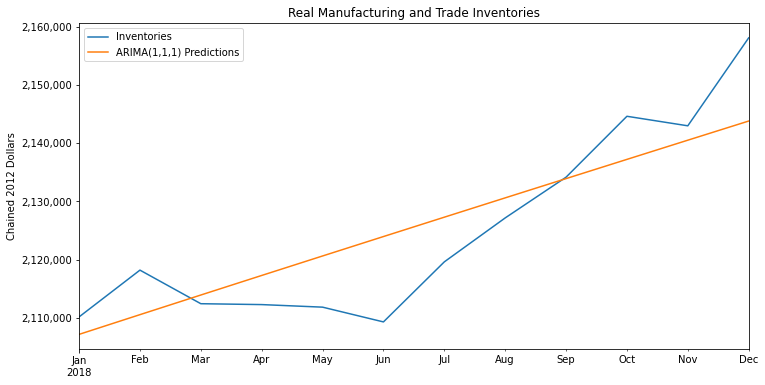

In [178]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

<b> Evaluating the Model

In [179]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 60307639.94


In [180]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 7765.799376


<b> Forecastinh the Future

In [181]:
model = ARIMA(trade_invnt['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(trade_invnt),len(trade_invnt)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

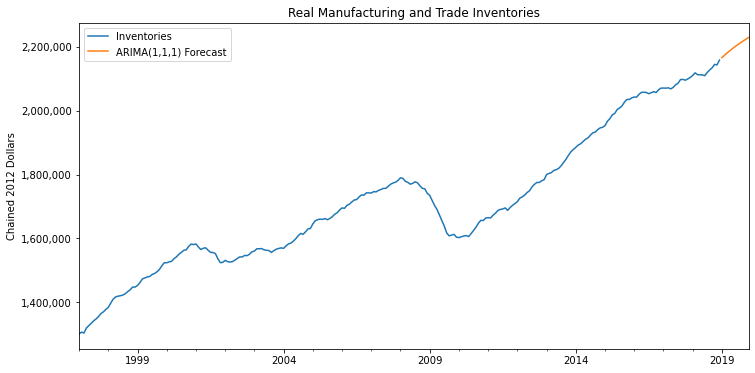

In [182]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = trade_invnt['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___

# <font color=red> SARIMA(p,d,q)(P,D,Q)m Seasonal Autoregressive Integrated Moving Averages. <br>
ARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

In [183]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima


#### <font color = Blue> <b> Importing Data Containint CO2 Level in Hawai

In [184]:
hawaii = pd.read_csv("Data/co2_mm_mlo.csv")
hawaii.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [185]:
# Creating A time Stamp Data Column out of year and Month Column

hawaii['Date'] = pd.to_datetime({'year': hawaii['year'], 'month': hawaii['month'], 'day':1})
hawaii.head()

year  month  decimal_date  average  interpolated       Date
0  1958      3      1958.208   315.71        315.71 1958-03-01
1  1958      4      1958.292   317.45        317.45 1958-04-01
2  1958      5      1958.375   317.50        317.50 1958-05-01
3  1958      6      1958.458      NaN        317.10 1958-06-01
4  1958      7      1958.542   315.86        315.86 1958-07-01

In [186]:
hawaii.set_index('Date', inplace=True)
hawaii.index.freq = 'MS'
hawaii.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='Date', length=729, freq='MS')

<AxesSubplot:xlabel='Date'>

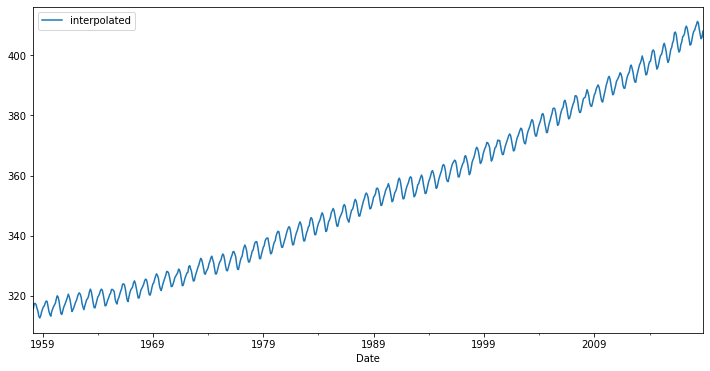

In [187]:
#Plotting the Interpolated column
hawaii['interpolated'].plot(figsize=(12,6), legend=True)

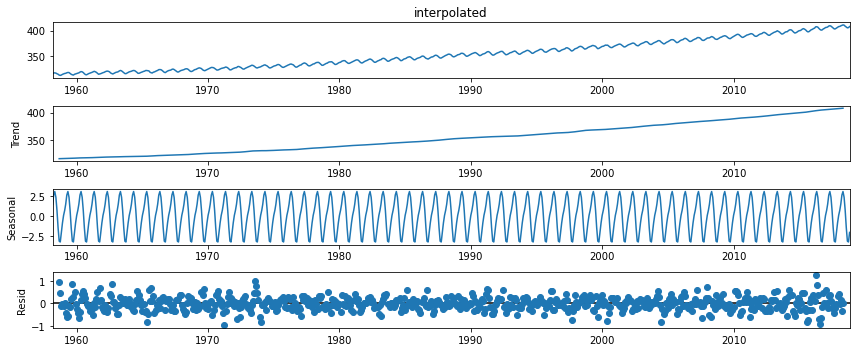

In [188]:
#Apply Seasonal Decomposition To see the Seasonality in The Data

result =  seasonal_decompose(hawaii['interpolated'], model='add')

result.plot();

<AxesSubplot:xlabel='Date'>

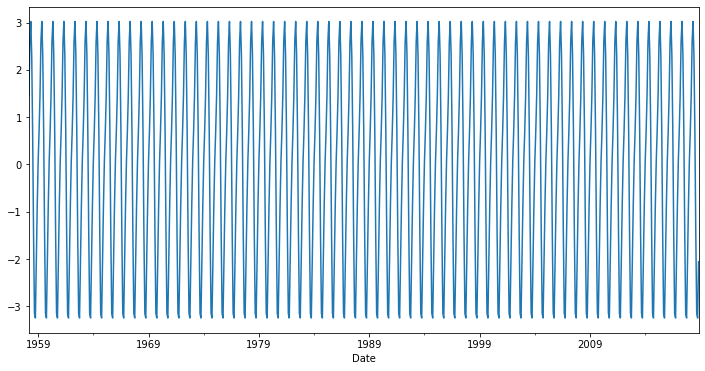

In [189]:
# Checking the seasonality Period

result.seasonal.plot(figsize=(12,6))

<font color = green> <b> Seasonality is repeating every 12 months i.e. 1 year

In [190]:
#Running the Auto Arima

auto_arima(hawaii['interpolated'], seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=458.371, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.954, Time=1.34 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.624, Time=1.27 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=501.138, Time=3.69 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.381, Time=3.74 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=0.75 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.58 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.731, Time=5.12 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.40 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=451.828, Time=2.21 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Wed, 03 Feb 2021   AIC                            423.401
Time:                                      22:32:39   BIC                            450.943
Sample:                                           0   HQIC                           434.028
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3560      0.035    -10.073      0.000      -0.425      -0.287
ma.L2         -0.0224      0.028     -0.792      0.428      -0.078       0.033
ma.L3         -0.0861      0.028     -3.042      0.002      -0.142      -0.031
ar.S.L12       0.9996      0.000   2870.137      0.000       0.999       1.000
ma.S.L12      -0.8653      0.021    -40.475      0.000      -0.907      -0.823
sigma2         0.0956      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = green> <b> From the above Auto ARIMA model we got thefollowing value: p=0, d=1, q=3, P=1, D=0, Q=1, m=12

<b> Train Test Split

In [191]:
len(hawaii)

729

In [192]:
train = hawaii.iloc[:717]
test = hawaii.iloc[717:]

<b> Training the Model and Predicting for Test Data

In [193]:
model = SARIMAX(train['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))

In [194]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.189
Date:                              Wed, 03 Feb 2021   AIC                            414.378
Time:                                      22:33:00   BIC                            441.820
Sample:                                  03-01-1958   HQIC                           424.975
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3536      0.036     -9.920      0.000      -0.423      -0.284
ma.L2         -0.0240      0.037     -0.649      0.516      -0.096       0.048
ma.L3         -0.0876      0.030     -2.965      0.003      -0.146      -0.030
ar.S.L12       0.9996      0.000   3076.618      0.000       0.999       1.000
ma.S.L12      -0.8669      0.022    -38.555      0.000      -0.911      -0.823
sigma2         0.0950      0.005     20.287      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.77   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
# Predicting for the Test Data
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start,end,typ='levels').rename("SARIMA Predictions")

<AxesSubplot:xlabel='Date'>

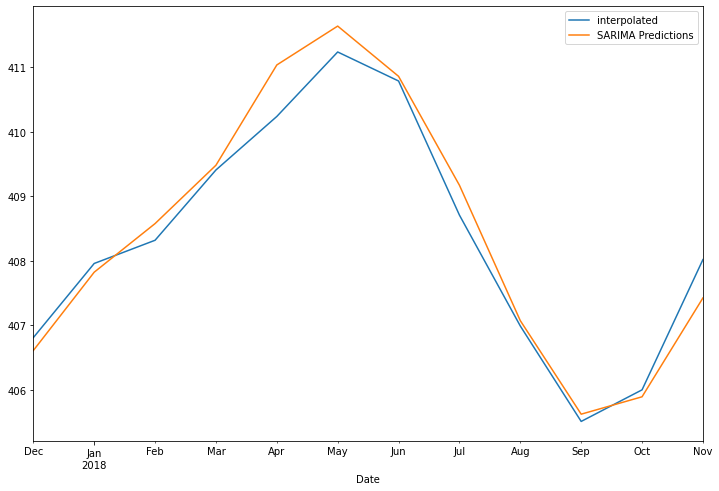

In [196]:
# Plotting actual VS Predicted Values

test['interpolated'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

In [197]:
test['interpolated'].mean()

408.3333333333333

In [198]:
# Evaluating the Model

from statsmodels.tools.eval_measures import rmse, rmspe

error = rmse(test['interpolated'], predictions)
error1= rmspe(test['interpolated'], predictions)

print(error)
print(error1)

0.3576366587203376
0.00873720451738255


<b> Forcasting the Future

In [199]:
model1 = SARIMAX(hawaii['interpolated'], order=(0,1,3), seasonal_order=(1,0,1,12))
results1 = model1.fit()

In [200]:
fcast = results1.predict(len(hawaii), len(hawaii)+24, typ='level').rename("SARIMA Forecast Values")

<AxesSubplot:xlabel='Date'>

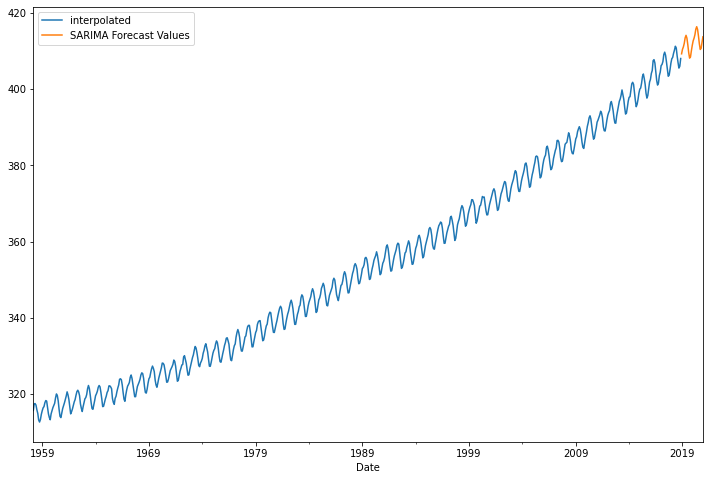

In [201]:
# Plotting actual VS Forecasted Values

hawaii['interpolated'].plot(figsize=(12,8), legend=True)
fcast.plot(legend=True)

___

# <font color = red> SARIMAX Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

In [202]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima



<font color=blue> <b> Importing the Data containing footfall of the customers in 4 restaurants along with the details of the holidays

In [203]:
resto = pd.read_csv("Data/RestaurantVisitors.csv", index_col='date', parse_dates=True)
resto.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

<font color =green> <b> Holiday is a Exogeneous Variable in the Data set

In [204]:
resto.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [205]:
# Dropping the Missing Data

resto1 = resto.dropna()
resto1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

<font color = blue> <b> Changing the variable Data type from Float to Integer

In [206]:
resto1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [207]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']
for column in cols:
    resto1[column] = resto1[column].astype(int)

In [208]:
resto1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01    296  
2016-01-02    191  
2016-01-03    202  
2016-01-04    105  
2016-01-05     98

<AxesSubplot:xlabel='date'>

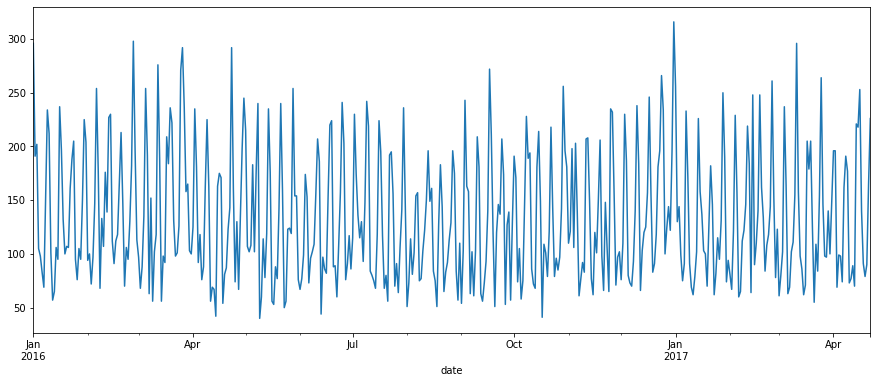

In [209]:
# Plotting the Total Footfall

resto1['total'].plot(figsize=(15,6))

<font color = blue> <b> Plotting the Daily Total Footfall along with the Holiday to see the seasonality 

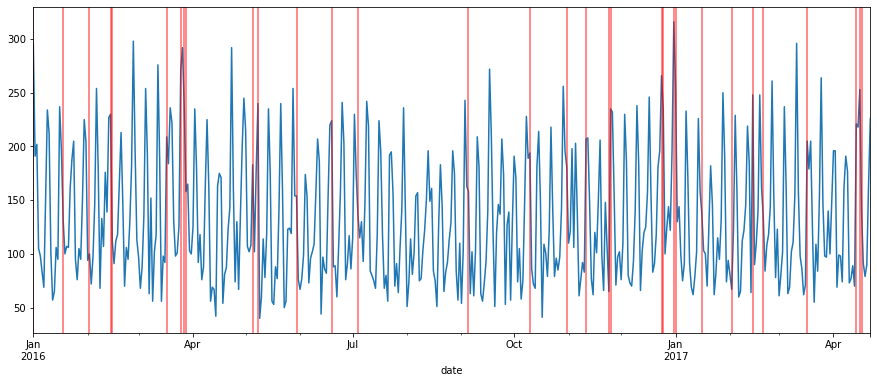

In [210]:
ax = resto1['total'].plot(figsize=(15,6))

# Plotting the Holiday along with the above graph
for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.6)   # axvline: To plot the Verticle Line

<font color = green> <b> From the Above plot we can see that Holiday is effecting the Footfall in the restaurants. But it is still unclear if this variable Holdays is predictive for how many visitors will be there in the restaurant

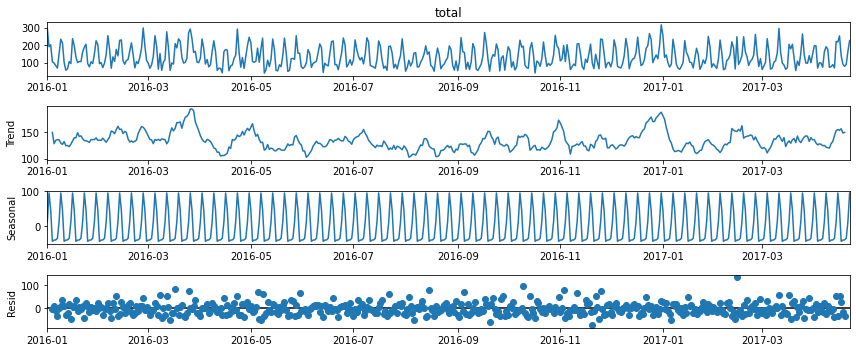

In [211]:
#We will check and confirm the seasonality by ETS decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(resto1['total'])
result.plot();


<AxesSubplot:xlabel='date'>

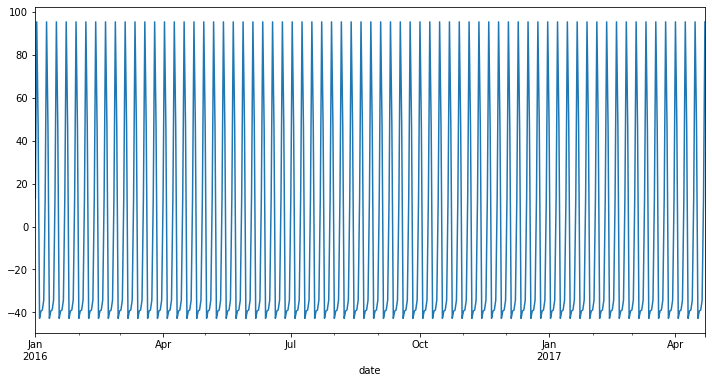

In [212]:
# Ploting the seasonal Component

result.seasonal.plot(figsize=(12,6))

<font color = green> <b> From the the above plot we can confirm there is seasonality in the data and it is weekly

## <font color = blue> First we will fit the simple SARIMA Model to our Data Set

<b> Train-Test Split

In [213]:
len(resto1)

478

In [214]:
train = resto1.iloc[:436]
test = resto1.iloc[436:]

In [215]:
# APplying Auto Arima to know the p, d, q component of Trend and Seasonality

auto_arima(resto1['total'], seasonal=True, m=7, trace=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.174
Date:                   Wed, 03 Feb 2021   AIC                           4772.347
Time:                           22:33:57   BIC                           4789.025
Sample:                                0   HQIC                          4778.904
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3703      1.666      2.622      0.009       1.104       7.637
ar.S.L7        0.9659      0.012     78.681      0.000       0.942       0.990
ma.S.L7       -0.7236      0.051    -14.137      0.000      -0.824      -0.623
sigma2      1257.8216     76.628     16.415      0.000    1107.633    1408.010
===================================================================================
Ljung-Box (L1) (Q):                  14.43   Jarque-Bera (JB):                58.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.70
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<b> Fitting and Predicting for Test Data

In [216]:
model =  SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7))
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 03 Feb 2021   AIC                           4336.738
Time:                           22:34:03   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8052     58.738     18.928      0.000     996.680    1226.930
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
start = len(train)
end = len(train) + len(test) -1

In [218]:
predictions = results.predict(start,end).rename("SARIMA Model")

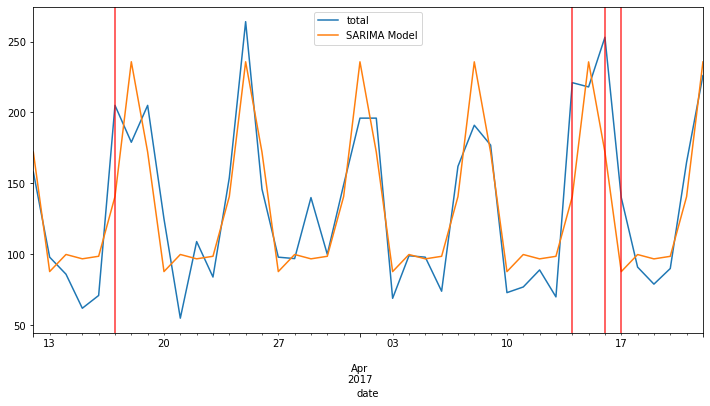

In [219]:
# Plotting the Actual vs Predicted Values
ax = test['total'].plot(figsize=(12,6), legend=True)
predictions.plot(legend=True)

for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

<font color = green> <b> We can se from the above Plot that Model was not  able to predict correctly for the days with the holiday.

In [220]:
# Evaluating the Model Quantitatively

from statsmodels.tools.eval_measures import rmse, rmspe

print("RMSE of the Model is:", rmse(test['total'],predictions) )
print("RMSPE of the Model is:", rmspe(test['total'],predictions))
print("The Mean of visitors in Test Data is:", test['total'].mean())


RMSE of the Model is: 31.913882348270587
RMSPE of the Model is: 2.5756186178423723
The Mean of visitors in Test Data is: 134.26190476190476


<font color=green> <b> By Comparing the RMSE of the predicting values and Mean of the Actual Values, we can se the Simple SARIMA model is not predicting correctly. 

### <font color = blue> Now We will include the Exogeneous Variable and Predict and Forecast Using SARIMAX model

In [221]:
resto1[['holiday']].head()

holiday
date               
2016-01-01        1
2016-01-02        0
2016-01-03        0
2016-01-04        0
2016-01-05        0

In [222]:
# Checking if the component of the model are same after Icluding the Exogeneous variable
# For X: (exogeneous Variable), statsmodel will take DataFrame as a Input
auto_arima(resto1['total'], X = resto1[['holiday']], seasonal=True, m=7, trace=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2356.222
Date:                             Wed, 03 Feb 2021   AIC                           4724.445
Time:                                     22:34:38   BIC                           4749.462
Sample:                                 01-01-2016   HQIC                          4734.280
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.9607      3.068      5.202      0.000       9.947      21.974
holiday       45.6326      4.446     10.264      0.000      36.919      54.347
ar.L1          0.1170      0.048      2.415      0.016       0.022       0.212
ar.S.L7        0.8730      0.023     37.833      0.000       0.828       0.918
ma.S.L7       -0.3163      0.056     -5.664      0.000      -0.426      -0.207
sigma2      1118.8200     80.218     13.947      0.000     961.596    1276.044
===================================================================================
Ljung-Box (L1) (Q):                   1.68   Jarque-Bera (JB):                 4.92
Prob(Q):                              0.20   Prob(JB):                         0.09
Heteroskedasticity (H):               0.91   Skew:                             0.22
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = green> <b> After Including the Exogeneour Variable, the Order of p, d, q and P, D, Q are changed as compare to the SARIMAX model withour the 'X'

In [223]:
#Train and FIT our SARIMAX Model
model1 =  SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0), seasonal_order=(1,0,1,7))

results_X =  model1.fit()
results_X.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Wed, 03 Feb 2021   AIC                           4188.124
Time:                                     22:34:43   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5061      3.763     18.203      0.000      61.130      75.882
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   9.02e-05   1.11e+04      0.000       1.000       1.000
ma.S.L7       -0.9460      0.023    -41.601      0.000      -0.991      -0.901
sigma2       783.4330     45.150     17.352      0.000     694.941     871.925
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.24
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
predictions_X = results_X.predict(start,end, exog= test[['holiday']]).rename("SARIMAX - With Exog. Variable")

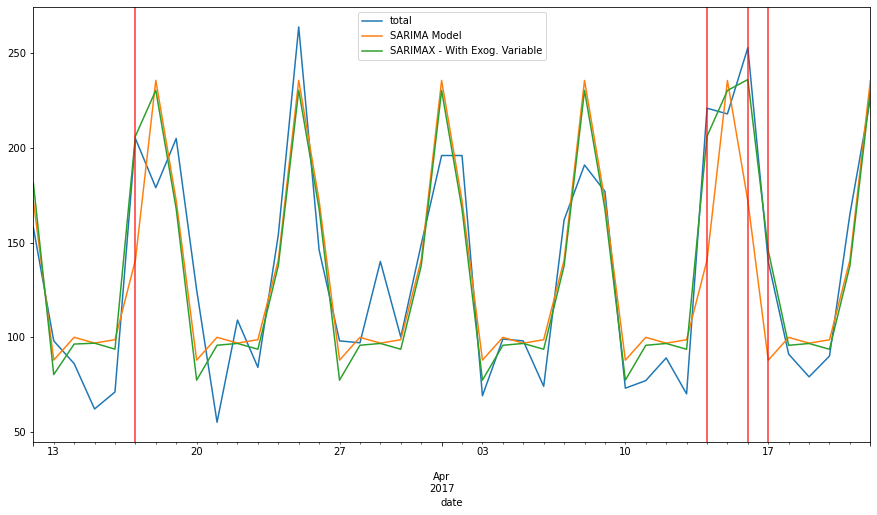

In [225]:
# Plotting the Actual vs Predicted Values
ax = test['total'].plot(figsize=(15,8), legend=True)
predictions.plot(legend=True)
predictions_X.plot(legend=True)

for day in resto1.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

<font color = green> <b> We can now see the Model is prediction more accurately for the Days with Holidays as Compare to the normal SARIMA model

In [226]:
# Evaluating the Model Quantitatively

from statsmodels.tools.eval_measures import rmse, rmspe

print("RMSE of the Model is:", rmse(test['total'],predictions_X) )
print("RMSPE of the Model is:", rmspe(test['total'],predictions_X))
print("The Mean of visitors in Test Data is:", test['total'].mean())


RMSE of the Model is: 23.26684846471413
RMSPE of the Model is: 2.1852234358541414
The Mean of visitors in Test Data is: 134.26190476190476


###  <font color = blue> Forcaating for the Future Values

In [227]:
modelF = SARIMAX(resto1['total'],exog=resto1[['holiday']], order=(1,0,0), seasonal_order=(1,0,1,7))
resultsF = modelF.fit()
exog_Forecast = resto[478:][['holiday']]
len(exog_Forecast)
fcast_X = resultsF.predict(len(resto1), len(resto1)+38, exog= exog_Forecast).rename("FINAL SARIMAX Forecast")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


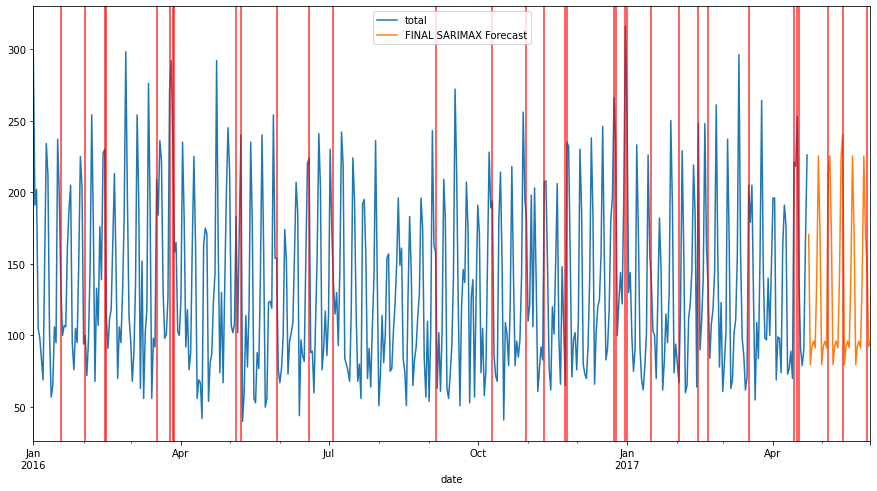

In [228]:
# Plotting the Actual vs Predicted Values
ax = resto1['total'].plot(figsize=(15,8), legend=True)
fcast_X.plot(legend=True)

for day in resto.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

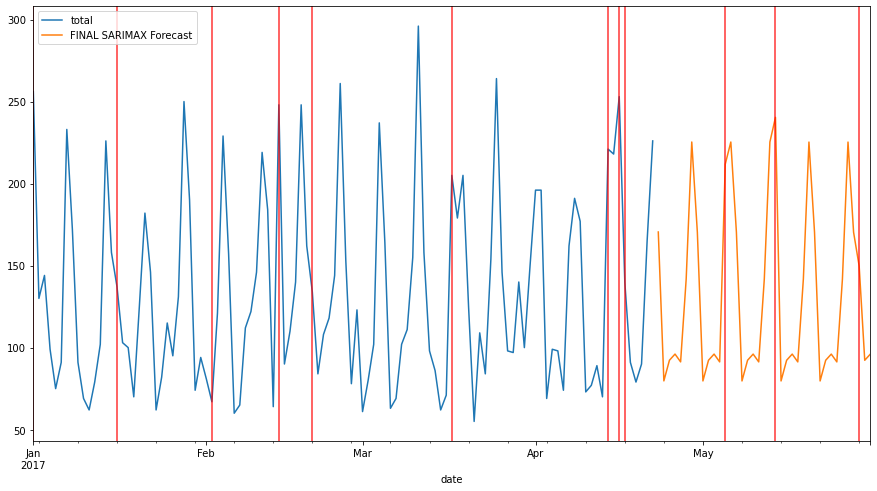

In [229]:
# Plotting the Actual vs Predicted Values
ax = resto1['total'].loc['2017-01-01':].plot(figsize=(15,8), legend=True)
fcast_X.plot(legend=True)

for day in resto.query("holiday==1").index:       #Same as for day in resto1[resto1["Holiday"]==1].index:
    ax.axvline(x=day, color='red', alpha=0.8)

___

# <font color = red> VAR Vector AutoRegression <br>

The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future    

In [230]:
# Importing requried method from stats model Libraries

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, rmspe

 <b> For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [231]:
# Loading the Dataset

# Data set containing Details of the Personal assets
Y1 = pd.read_csv("Data/M2SLMoneyStock.csv", index_col=0, parse_dates=True)
Y1.index.freq ='MS'
# Data set containing details of Personal Spendings

Y2 = pd.read_csv("Data/PCEPersonalSpending.csv", index_col=0, parse_dates=True)
Y2.index.freq ='MS'

In [232]:
Y1.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

In [233]:
Y2.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

In [234]:
# JOining the Both  the Data Set

Y1 = Y1.join(Y2)

Y1.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

<AxesSubplot:xlabel='Date'>

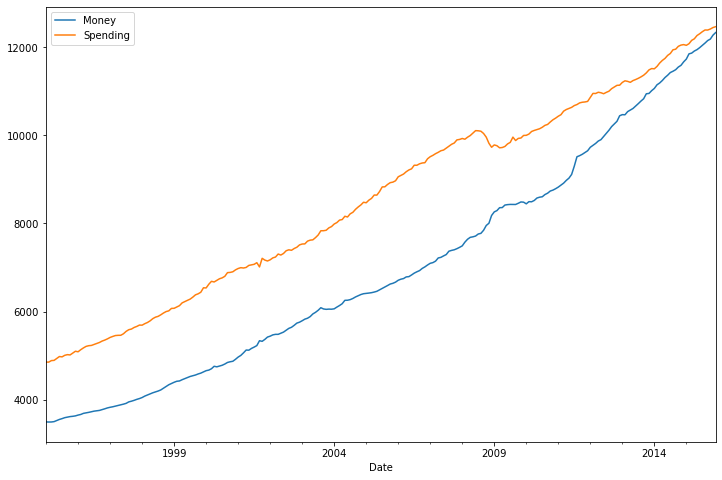

In [235]:
# Plotting the Data to See  the Trend

Y1.plot(figsize = (12,8))

### <font color = blue> Checking Stationarity of the Data set

In [236]:
# Checking the Stationarity oof the First Column
#adf_test function is Defined in the Segment where ADF is explained
adf_test(Y1['Money'], 'US Data for Income')

Augmented Dickey-Fuller Test: US Data for Income
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [237]:
# Checking the Stationarity of the Second Column

adf_test(Y1['Spending'], "US Data for Spending")

Augmented Dickey-Fuller Test: US Data for Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<font color = green> <b> From the above test of Staionarity we can confirm both datas : Income and Spending are Non-Stationarity

### <font color = blue> Converitng The Data to Stationary Data by Differencing of First  Order

In [238]:
Y1_Transform = Y1.diff()

In [239]:
Y1_Transform.head() 

Money  Spending
Date                       
1995-01-01    NaN       NaN
1995-02-01   -2.5      -0.4
1995-03-01    1.2      34.6
1995-04-01    8.1       4.8
1995-05-01   25.0      42.9

<AxesSubplot:xlabel='Date'>

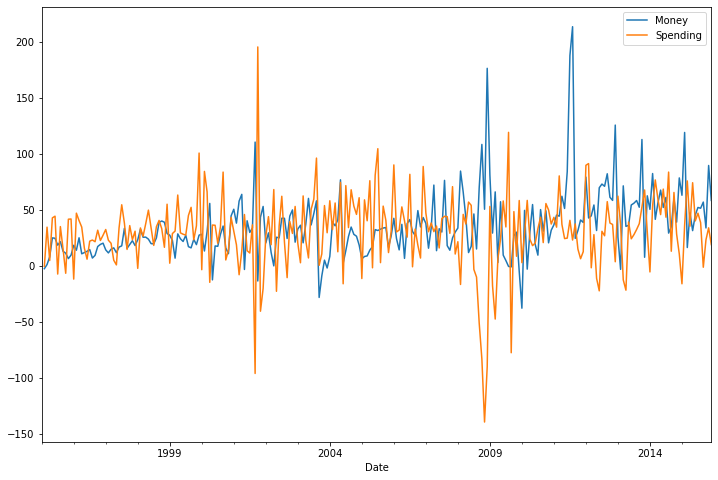

In [240]:
Y1_Transform.plot(figsize=(12,8))

In [241]:
# Reperforming the ADfuller test to Check the Stationarity

print(adf_test(Y1_Transform['Money'], 'US Data for Income'))
print(adf_test(Y1_Transform['Spending'], 'US Data for Income'))

Augmented Dickey-Fuller Test: US Data for Income
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
None
Augmented Dickey-Fuller Test: US Data for Income
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
None


<font color =green> <b> Form the Above Plot and ADfuller test after performing the Differencing of first order:
- Money Column is still non Stationary
- Spending Column is Stationary.

<font color = blue> <b> Appling second oreder Differencing on both the Columns.
        
    we will perform differencing on boththe columns to get same numbers of rows for VAR Model.

In [242]:
Y1_Transform  = Y1_Transform.diff().dropna()
Y1_Transform.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [243]:
# Performing the ADfuller test to Check the Stationarity

print(adf_test(Y1_Transform['Money'], 'US Data for Income'))
print(adf_test(Y1_Transform['Spending'], 'US Data for Income'))

Augmented Dickey-Fuller Test: US Data for Income
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
None
Augmented Dickey-Fuller Test: US Data for Income
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
None


<AxesSubplot:xlabel='Date'>

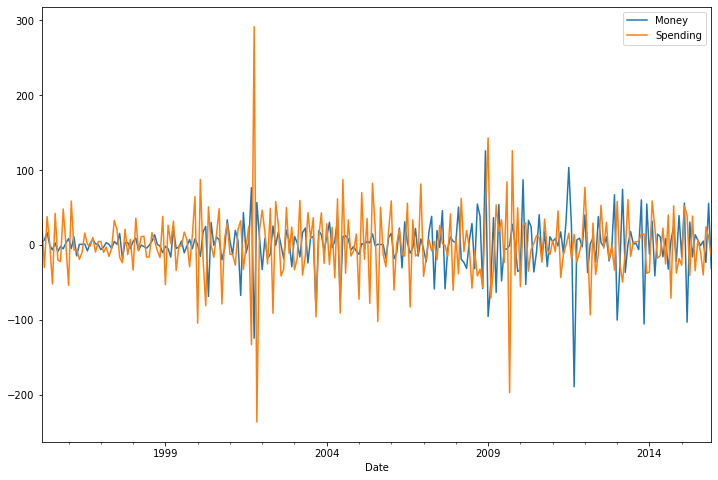

In [244]:
Y1_Transform.plot(figsize=(12,8))

<b> Train-Test SPlit

In [245]:
# Number of Observation in Test Set

nobs = 12

In [246]:
train = Y1_Transform[:-nobs]
test = Y1_Transform[-nobs:]

### <font color=blue> Performing The Grid Search for finding Order p of AR in VAR model

In [247]:
model = VAR(train)

# Fitting the model different values of p and Compairing their AIC values

for p in range(1,8):
    results = model.fit(p)
    print(f"For Order{p} the AIC value is {np.round(results.aic,2)}")

For Order1 the AIC value is 14.18
For Order2 the AIC value is 13.96
For Order3 the AIC value is 13.85
For Order4 the AIC value is 13.83
For Order5 the AIC value is 13.79
For Order6 the AIC value is 13.8
For Order7 the AIC value is 13.8


<font color=green> <b> From the above grid search we can see that the AIC value is Lowest for p=5 and Is againg started increasing after that.
So we will go for VAR model of order 5

In [248]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 03, Feb, 2021
Time:                     22:35:11
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [249]:
# Grab the 5 Lagged Value Right Before the test Set Start

lagged_value = train.values[-5:]
lagged_value.shape  

# VAR forcast method will take the np array of dimensions (p X k), where p is no of lagged or order of AR
# k is no of variables
# Here p is 5 and k is 2

(5, 2)

In [250]:
# Forcating for the test data
# The forcasted value have differencing  of 2nd order

fcast_test = results.forecast(y=lagged_value,steps=12)

In [251]:
# Creating a Date Index

idx = pd.date_range("2015-01-01", periods=12, freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [252]:
# Creating The Data Frame of Forcasted Value for Test Data

df_fcast_test = pd.DataFrame(fcast_test, index=idx,columns=["Money_2d", "Spending_2d"])
df_fcast_test.head()

Money_2d  Spending_2d
2015-01-01 -16.995276    36.149820
2015-02-01  -3.174038   -11.450298
2015-03-01  -0.377725    -6.684969
2015-04-01  -2.602233     5.479458
2015-05-01   4.228557    -2.443365

### <font color = blue> Invert the Transformation<br>
 <b> The forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the nobs variable we defined during the train/test/split step.

In [253]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_fcast_test['Money_1d'] = (Y1['Money'].iloc[-nobs-1] - Y1['Money'].iloc[-nobs-2]) + df_fcast_test['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_fcast_test['MoneyForecast'] = Y1['Money'].iloc[-nobs-1] + df_fcast_test['Money_1d'].cumsum()

In [254]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_fcast_test['Spending_1d'] = (Y1['Spending'].iloc[-nobs-1] - Y1['Spending'].iloc[-nobs-2]) + df_fcast_test['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_fcast_test['SpendingForecast'] = Y1['Spending'].iloc[-nobs-1] + df_fcast_test['Spending_1d'].cumsum()

In [255]:
df_fcast_test.head()

Money_2d  Spending_2d   Money_1d  MoneyForecast  Spending_1d  \
2015-01-01 -16.995276    36.149820  61.604724   11731.704724    46.749820   
2015-02-01  -3.174038   -11.450298  58.430686   11790.135410    35.299522   
2015-03-01  -0.377725    -6.684969  58.052961   11848.188371    28.614552   
2015-04-01  -2.602233     5.479458  55.450728   11903.639099    34.094010   
2015-05-01   4.228557    -2.443365  59.679285   11963.318384    31.650645   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549

### <font color = blue> Plotting the Actual and Forcasted Data

<AxesSubplot:xlabel='Date'>

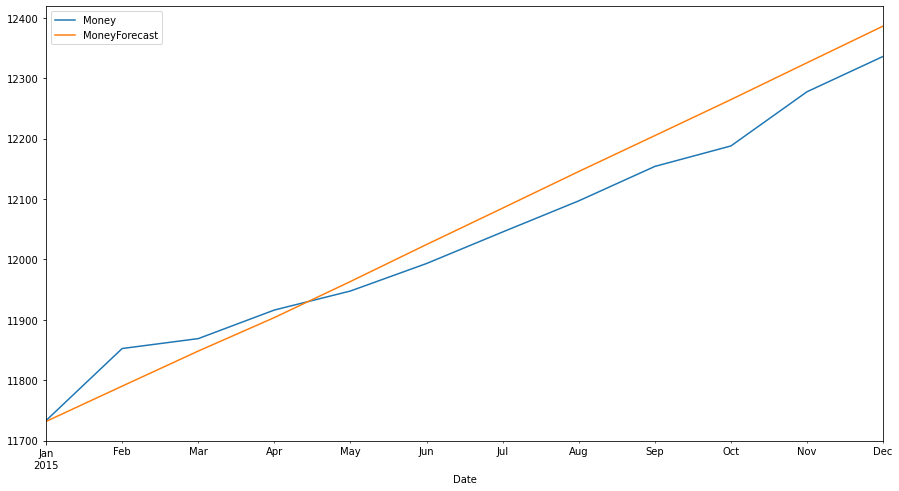

In [256]:
# Plotting for Money Column
Y1.iloc[-nobs:]["Money"].plot(figsize=(15,8), legend=True)
df_fcast_test["MoneyForecast"].plot(legend=True)

<AxesSubplot:xlabel='Date'>

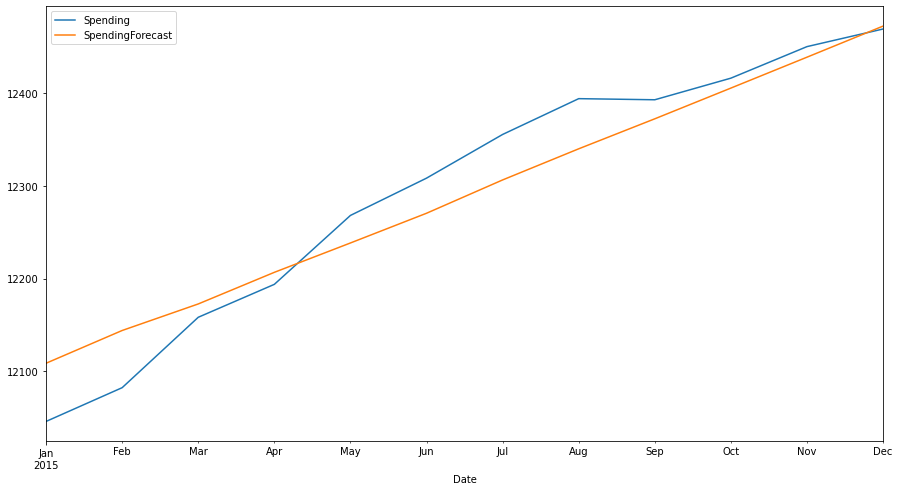

In [257]:
# Plotting for SPending Column
Y1.iloc[-nobs:]["Spending"].plot(figsize=(15,8), legend=True)
df_fcast_test["SpendingForecast"].plot(legend=True)

In [258]:
print("RMSE for Income column is: ", np.round(rmse(Y1.iloc[-nobs:]["Money"],df_fcast_test["MoneyForecast"]),2))
print("Mean of Income For Test Range is:", np.round(Y1.iloc[-nobs:]["Money"].mean(),2))
print("RMSE for Spending column is: ", np.round(rmse(Y1.iloc[-nobs:]["Spending"],df_fcast_test["SpendingForecast"]),2))
print("Mean of Spending For Test Range is:", np.round(Y1.iloc[-nobs:]["Spending"].mean(),2))

RMSE for Income column is:  43.71
Mean of Income For Test Range is: 12034.01
RMSE for Spending column is:  37.0
Mean of Spending For Test Range is: 12294.53
